# **Heart Disease Prediction**

# Import Libraries

In [1]:
# Data Preprocessing 
import numpy as np
import pandas as pd

# Data Visuzlization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings

from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")
sns.set_palette(palette="vlag")

mpl.rcParams['figure.dpi'] = 100
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Explore Dataset

In [2]:
# Load the data
data_dir = 'data/merged_data.csv'
df = pd.read_csv(data_dir)
print(df.shape)
df.head()

(764927, 18)


,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,HeartDisease,KidneyDisease,Smoking,DiffWalking
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
1,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
2,Female,Excellent,0.0,0.0,No,6.0,No,No,Yes,No,26.57,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
3,Female,Very good,2.0,3.0,Yes,5.0,No,No,Yes,No,25.61,No,"White only, Non-Hispanic",Age 55 to 59,No,No,Never smoked,No
4,Female,Excellent,0.0,0.0,Yes,7.0,No,Yes,No,No,23.30,No,"White only, Non-Hispanic",NaN,No,No,Current smoker - now smokes some days,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764927 entries, 0 to 764926
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               764927 non-null  object 
 1   GenHealth         763729 non-null  object 
 2   PhysicalHealth    754000 non-null  float64
 3   MentalHealth      755860 non-null  float64
 4   PhysicalActivity  763834 non-null  object 
 5   SleepTime         759474 non-null  float64
 6   Stroke            763370 non-null  object 
 7   Asthma            763154 non-null  object 
 8   SkinCancer        761784 non-null  object 
 9   Diabetic          763840 non-null  object 
 10  BMI               716121 non-null  float64
 11  AlcoholDrinking   718353 non-null  object 
 12  Race              750870 non-null  object 
 13  AgeCategory       755848 non-null  object 
 14  HeartDisease      761862 non-null  object 
 15  KidneyDisease     763001 non-null  object 
 16  Smoking           72

In [4]:
nans = df.isna().sum().sort_values(ascending=False)
pct = (df.isna().sum() / df.isna().count()).sort_values(ascending=False) * 100
pd.concat([nans, pct], axis=1, keys=['NaNCount', 'Percent']).head(10)

,NaNCount,Percent
BMI,48806,6.380478
AlcoholDrinking,46574,6.088686
Smoking,35462,4.635998
DiffWalking,24012,3.139123
Race,14057,1.837692
PhysicalHealth,10927,1.428502
AgeCategory,9079,1.186911
MentalHealth,9067,1.185342
SleepTime,5453,0.712878
SkinCancer,3143,0.410889


Text(0.5, 1.0, 'Missing Value Counts')

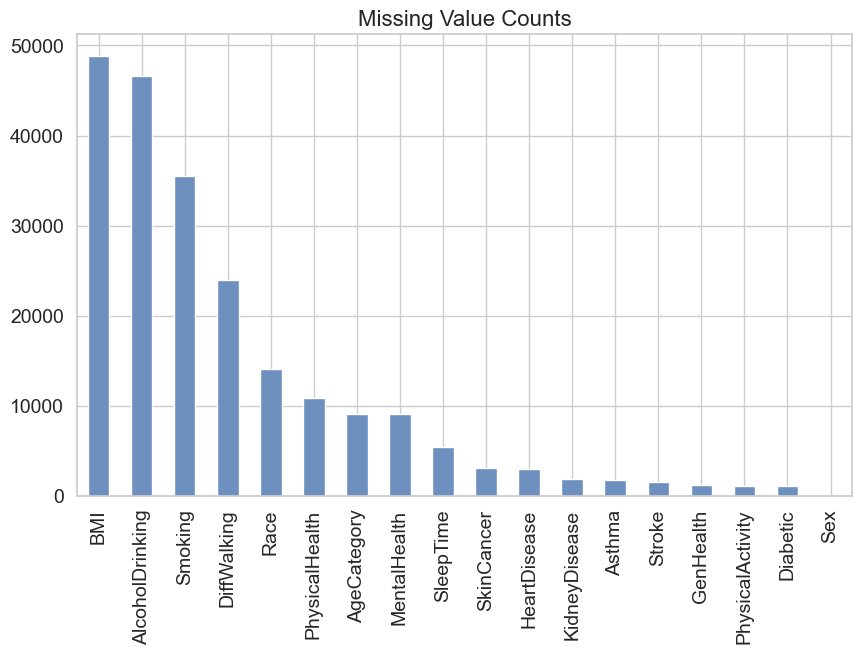

In [5]:
plt.figure(figsize=(10, 6))
df.isna().sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Value Counts')

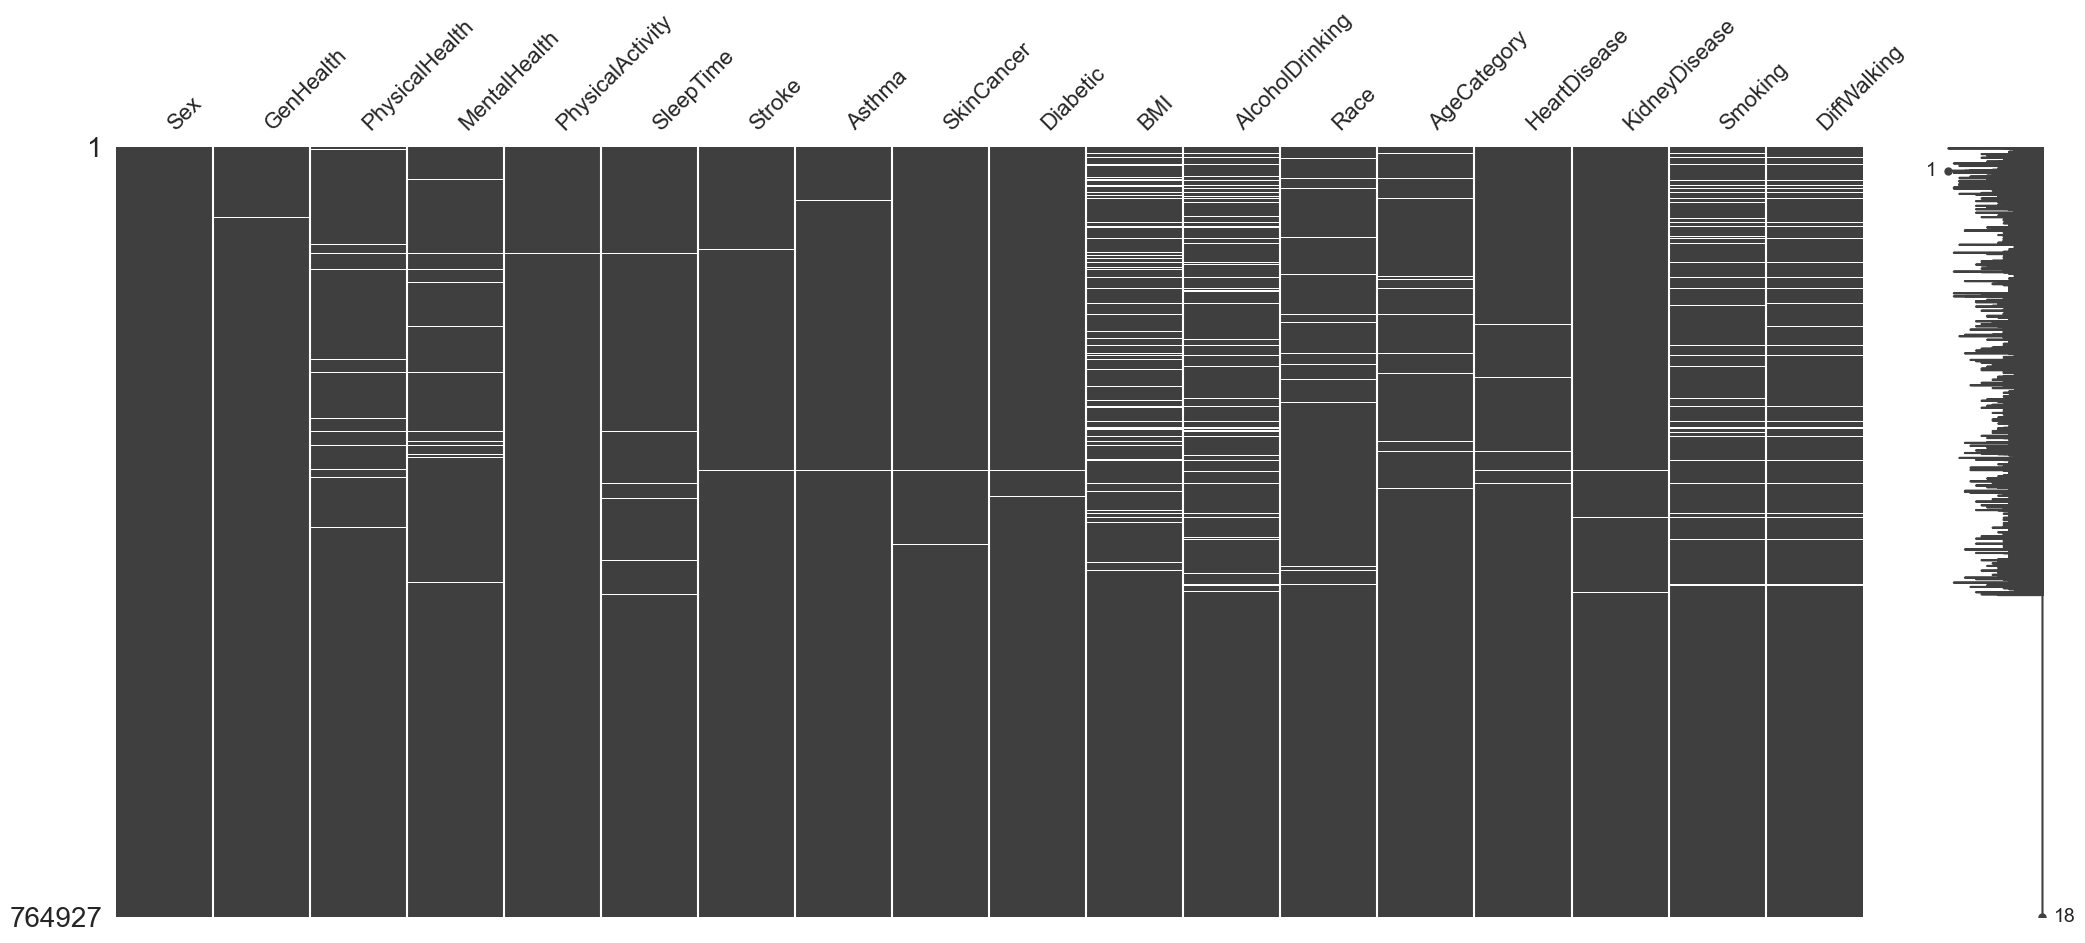

In [6]:
msno.matrix(df)
plt.show()

# Data Cleaning

In [7]:
# Reorder Columns
col_order = ['Sex',  'AgeCategory', 'BMI',  # User Information
             'GenHealth', 'PhysicalActivity', 'PhysicalHealth', 'MentalHealth', # General Health
             'SleepTime', 'DiffWalking',
             'Smoking', 'AlcoholDrinking',
             'KidneyDisease', 'Asthma', 'SkinCancer', # Medical History
             'Stroke', 'Diabetic',
             'Race',
             'HeartDisease']

df = df[col_order]
df.head()

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
0,Female,Age 80 or older,NaN,Very good,No,0.0,0.0,8.0,No,Never smoked,No,No,No,No,No,Yes,"White only, Non-Hispanic",No
1,Female,Age 80 or older,NaN,Very good,No,0.0,0.0,8.0,No,Never smoked,No,No,No,No,No,Yes,"White only, Non-Hispanic",No
2,Female,Age 80 or older,26.57,Excellent,No,0.0,0.0,6.0,No,Never smoked,No,No,No,Yes,No,No,"White only, Non-Hispanic",No
3,Female,Age 55 to 59,25.61,Very good,Yes,2.0,3.0,5.0,No,Never smoked,No,No,No,Yes,No,No,"White only, Non-Hispanic",No
4,Female,NaN,23.30,Excellent,Yes,0.0,0.0,7.0,No,Current smoker - now smokes some days,No,No,Yes,No,No,No,"White only, Non-Hispanic",No


In [8]:
# Drop NaNs
df = df.dropna()
df.isna().sum().sum()

0

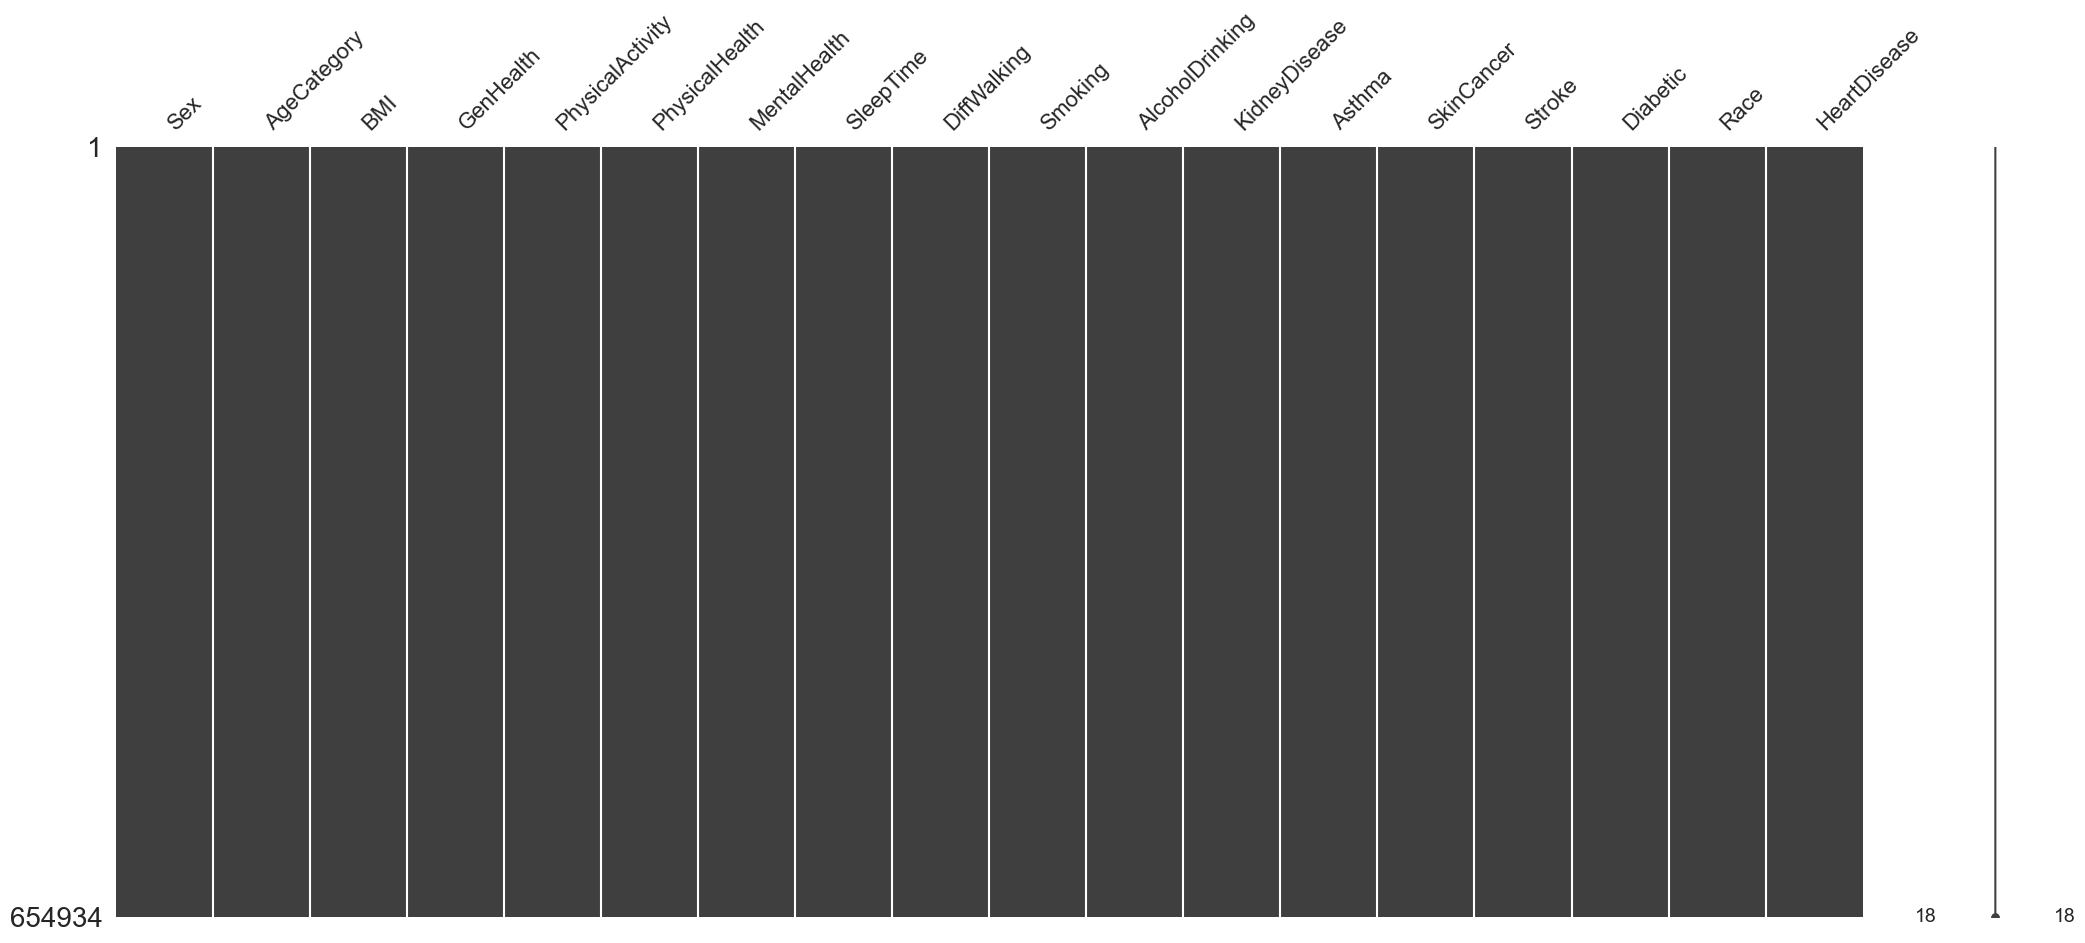

In [9]:
msno.matrix(df)
plt.show()

In [10]:
# Check for duplicates
df.duplicated().sum()

28215

In [11]:
# Drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df['Race'].value_counts()

Race
White only, Non-Hispanic          243997
White                             227724
Hispanic                           58222
Black only, Non-Hispanic           25385
Black                              22810
Other race only, Non-Hispanic      16903
Other                              10891
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64

In [13]:
# Define the mapping for renaming
mapping = {'White only, Non-Hispanic': 'White', 'Black only, Non-Hispanic': 'Black','Other race only, Non-Hispanic':'Other'}

# Replace values in the 'Race' column
df['Race'] = df['Race'].replace(mapping)

In [14]:
df['Race'].value_counts()

Race
White                             471721
Hispanic                           58222
Black                              48195
Other                              27794
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64

In [15]:
df['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       35076
Age 60 to 64       32956
Age 70 to 74       32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55 to 59       27470
Age 80 or older    25436
Age 50 to 54       25187
Age 75 to 79       24171
50-54              23736
80 or older        23352
Age 40 to 44       22619
Age 45 to 49       21452
Age 35 to 39       21418
75-79              20713
Age 18 to 24       20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30 to 34       19187
30-34              17953
Age 25 to 29       16779
25-29              16312
Name: count, dtype: int64

In [16]:
df['AgeCategory'] = df['AgeCategory'].str.replace(' to ', '-')
df['AgeCategory'] = df['AgeCategory'].str.replace('Age ', '')

In [17]:
df['AgeCategory'].value_counts()

AgeCategory
65-69          66746
60-64          64175
70-74          61816
55-59          55080
50-54          48923
80 or older    48788
75-79          44884
40-44          42456
45-49          41970
35-39          40944
18-24          40706
30-34          37140
25-29          33091
Name: count, dtype: int64

In [18]:
df.describe(include='object')

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
count,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719
unique,2,13,5,2,2,6,2,2,2,2,2,6,7,2
top,Female,65-69,Very good,Yes,No,Never smoked,No,No,No,No,No,No,White,No
freq,327512,66746,216345,479969,532388,193470,428773,599870,533883,569844,600775,521320,471721,580929


In [19]:
df['Diabetic'].value_counts()

Diabetic
No                                         521320
Yes                                         85659
No, pre-diabetes or borderline diabetes      7616
No, borderline diabetes                      6776
Yes, but only during pregnancy (female)      2792
Yes (during pregnancy)                       2556
Name: count, dtype: int64

In [20]:
replacements = {
    'Yes, but only during pregnancy (female)': 'Yes (during pregnancy)',
    'No, pre-diabetes or borderline diabetes': 'No, borderline diabetes'
}
df['Diabetic'].replace(replacements, inplace=True)

In [21]:
df['Diabetic'].value_counts()

Diabetic
No                         521320
Yes                         85659
No, borderline diabetes     14392
Yes (during pregnancy)       5348
Name: count, dtype: int64

In [22]:
for col in df.describe(include='object').columns:
    print(f'{col} : {df[col].unique()}')
    print('-'* 80)

Sex : ['Female' 'Male']
--------------------------------------------------------------------------------
AgeCategory : ['80 or older' '55-59' '40-44' '70-74' '65-69' '60-64' '75-79' '50-54'
 '45-49' '35-39' '30-34' '25-29' '18-24']
--------------------------------------------------------------------------------
GenHealth : ['Excellent' 'Very good' 'Fair' 'Poor' 'Good']
--------------------------------------------------------------------------------
PhysicalActivity : ['No' 'Yes']
--------------------------------------------------------------------------------
DiffWalking : ['No' 'Yes']
--------------------------------------------------------------------------------
Smoking : ['Never smoked' 'Former smoker' 'Current smoker - now smokes some days'
 'Current smoker - now smokes every day' 'Yes' 'No']
--------------------------------------------------------------------------------
AlcoholDrinking : ['No' 'Yes']
-------------------------------------------------------------------------------

# Exploratory Data Analysis

In [23]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['HeartDisease'])

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print(train.shape, test.shape)

(501375, 18) (125344, 18)


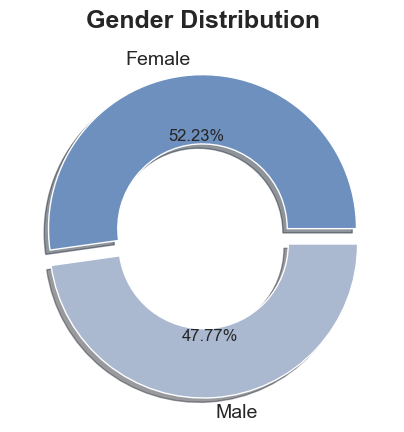

In [24]:
gender_count = train['Sex'].value_counts()

plt.figure(figsize=(5,5))
plt.title("Gender Distribution", fontsize = 18, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%',
       wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])

plt.show()

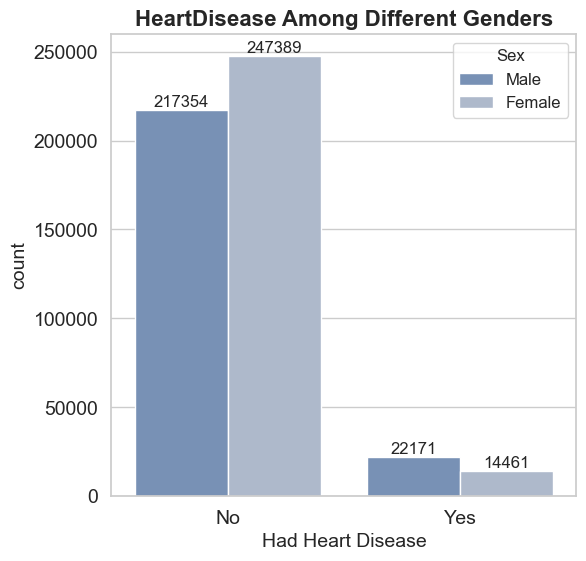

In [25]:
# Set figure size and style
plt.figure(figsize=(6, 6))

# Plot countplot
ax = sns.countplot(data=train, x='HeartDisease', hue='Sex')

# Customize plot

ax.set_title("HeartDisease Among Different Genders", fontsize=16,  weight='bold')
ax.set_xlabel("Had Heart Disease", fontsize=14)
ax.set_ylabel("count", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()


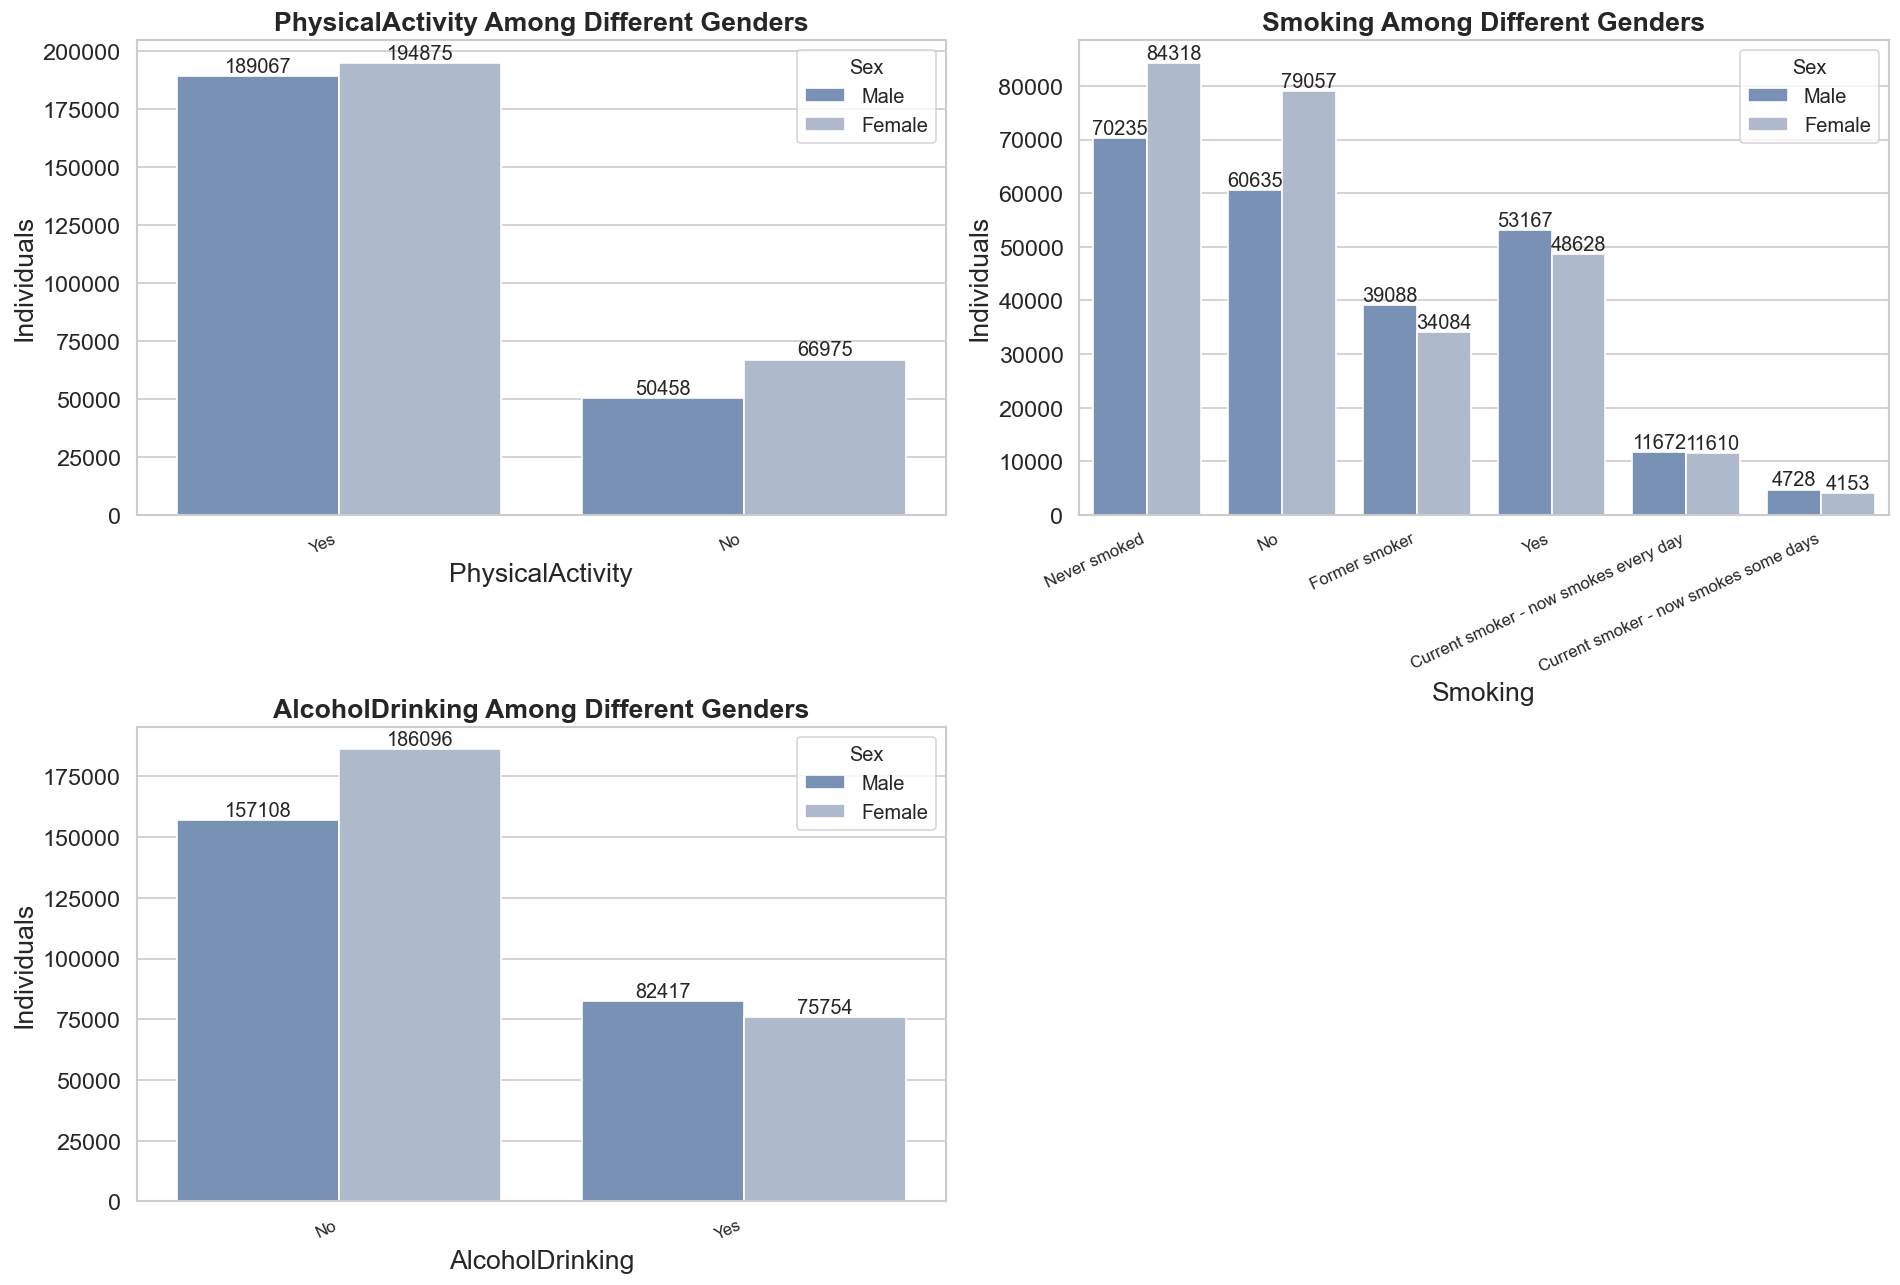

In [26]:
plt.figure(figsize=(16, 16), dpi = 120)
risk_factors = ['PhysicalActivity', 'Smoking', 'AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=train, x=risk_factor, hue='Sex')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=16, weight='bold')
    plt.xlabel(risk_factor, fontsize=16)
    plt.ylabel("Individuals", fontsize=16)
    plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
    for c in x.containers:
        x.bar_label(c)
        

plt.tight_layout()
plt.show()

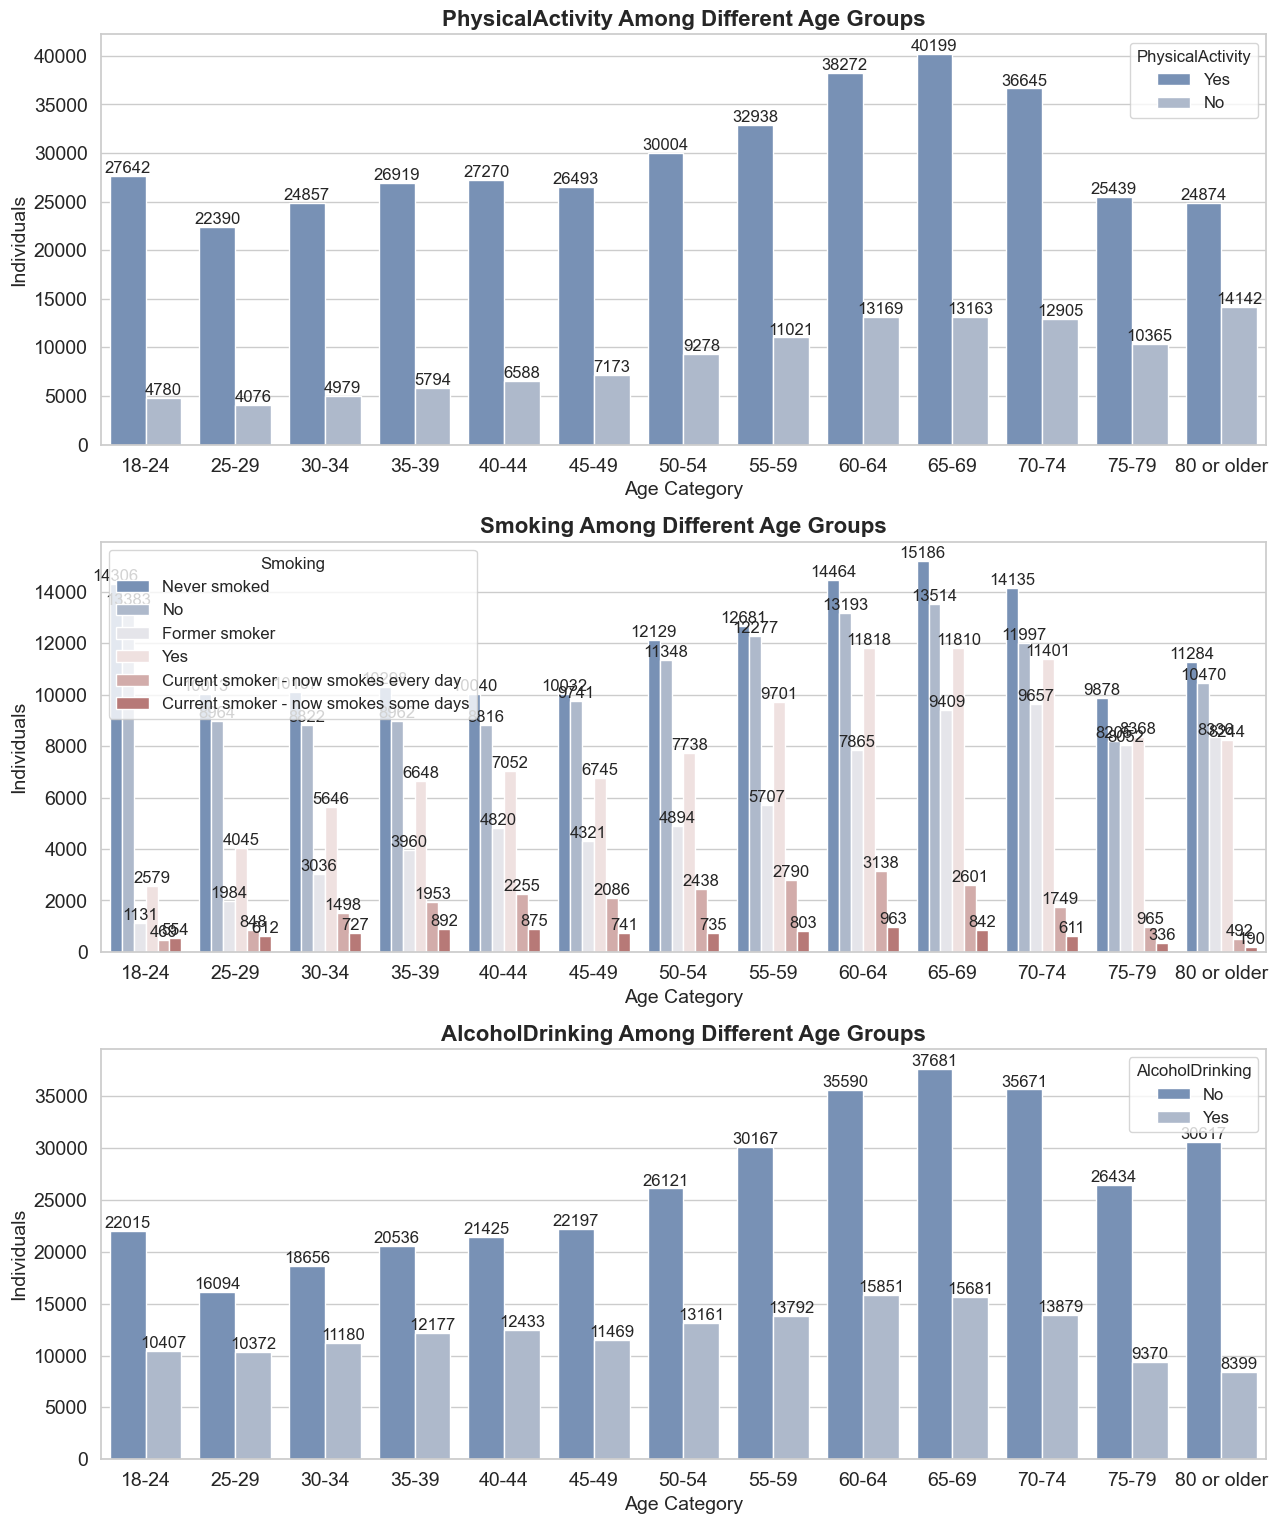

In [27]:
plt.figure(figsize=(13, 25))
risk_factors = ['PhysicalActivity' ,'Smoking','AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=train, x='AgeCategory', hue=risk_factor,
                     order = train['AgeCategory'].value_counts().sort_index().index.values)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=16, weight='bold')
    plt.xlabel("Age Category", fontsize=14)
    plt.ylabel("Individuals", fontsize=14)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()

plt.show()

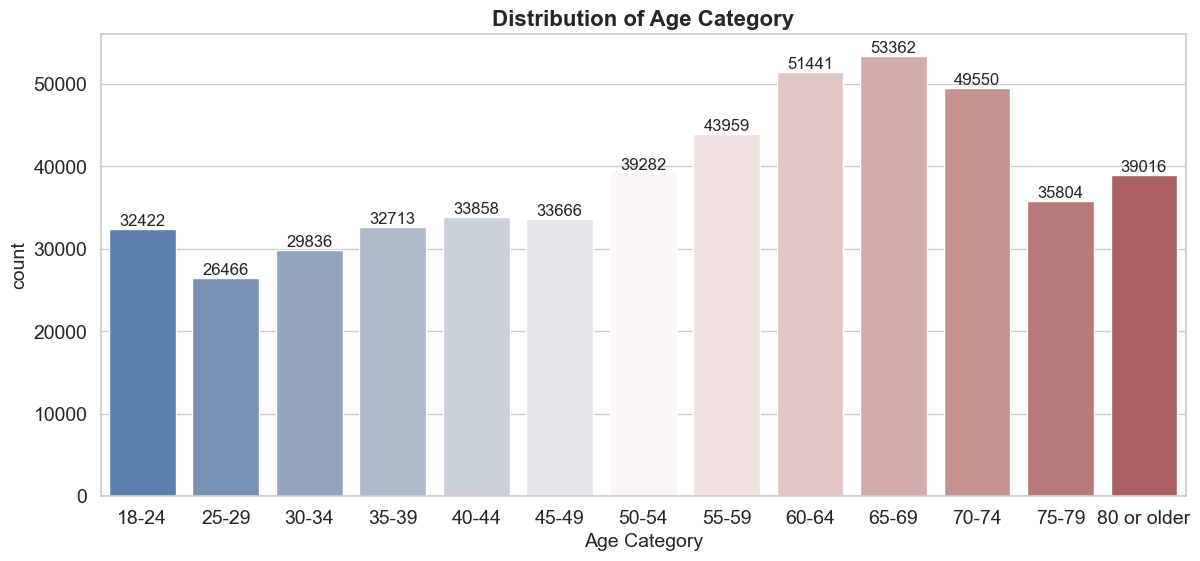

In [28]:
# Set figure size and style
plt.figure(figsize=(14, 6))

# Plot countplot
ax = sns.countplot(data=train, x='AgeCategory', palette='vlag',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title('Distribution of Age Category', fontsize=16, weight='bold')
ax.set_xlabel('Age Category', fontsize=14)
ax.set_ylabel('count', fontsize=14)
ax.tick_params(axis='x', rotation=0)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()


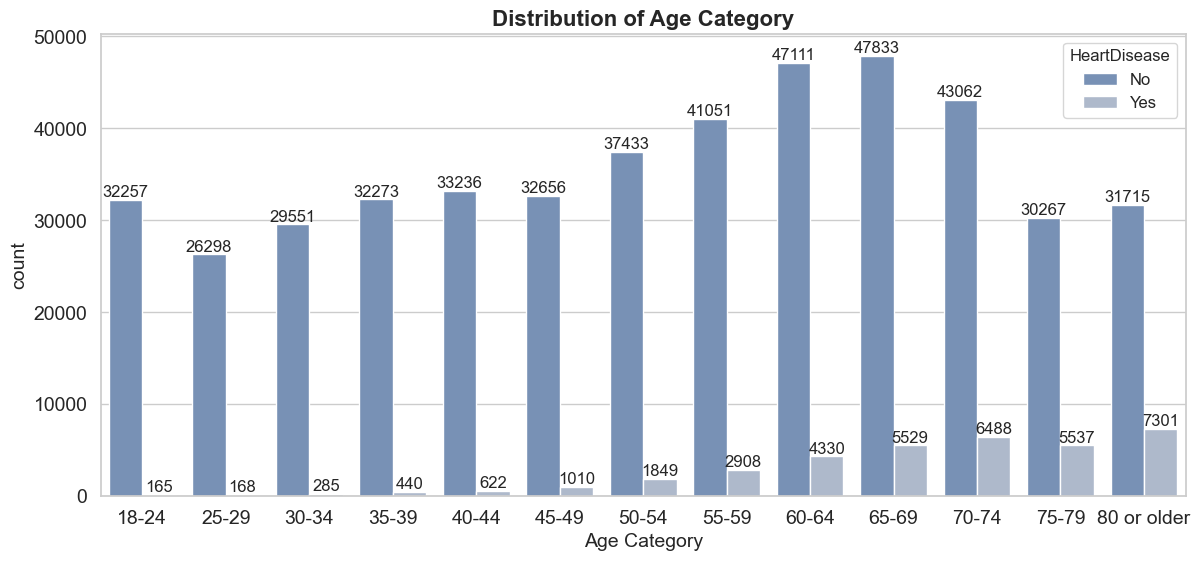

In [29]:
# Set figure size and style
plt.figure(figsize=(14, 6))

# Plot countplot
ax = sns.countplot(data=train, x='AgeCategory', hue='HeartDisease',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title('Distribution of Age Category', fontsize=16, weight='bold')
ax.set_xlabel('Age Category', fontsize=14)
ax.set_ylabel('count', fontsize=14)
ax.tick_params(axis='x', rotation=0)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

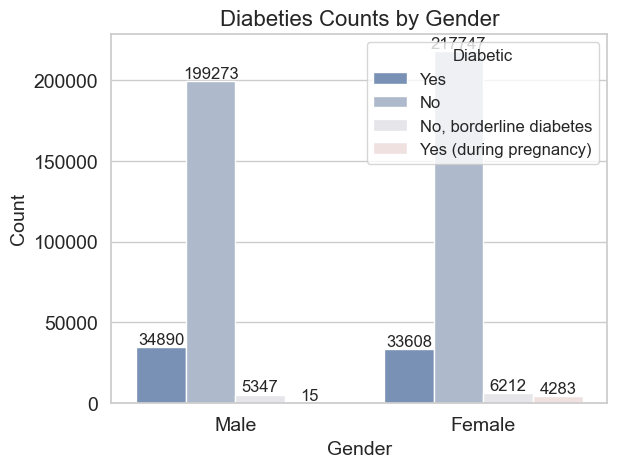

In [30]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Diabetic", data=train)

for c in ax.containers:
    ax.bar_label(c)

# Set plot title, labels, and show the plot
plt.title('Diabeties Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [31]:
train["Smoking"].value_counts()

Smoking
Never smoked                             154553
No                                       139692
Yes                                      101795
Former smoker                             73172
Current smoker - now smokes every day     23282
Current smoker - now smokes some days      8881
Name: count, dtype: int64

In [32]:
replacements = {
    'Never smoked': 'No',
    'Former smoker': 'No',
    'Current smoker - now smokes some days': 'Yes',
    'Current smoker - now smokes every day': 'Yes'
}

train['Smoking'].replace(replacements, inplace=True)

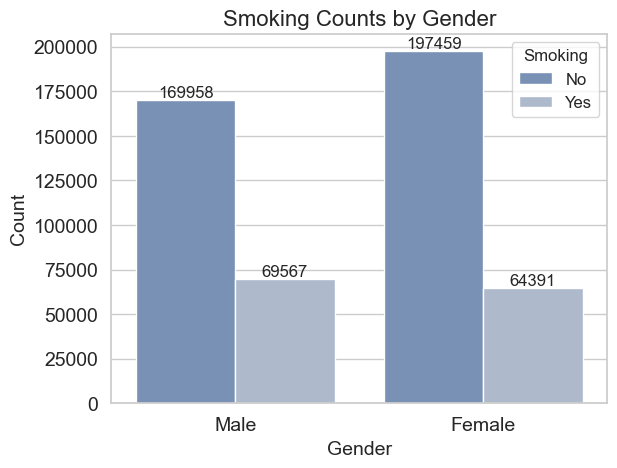

In [33]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=train)

for c in ax.containers:
    ax.bar_label(c)

# Set plot title, labels, and show the plot
plt.title('Smoking Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

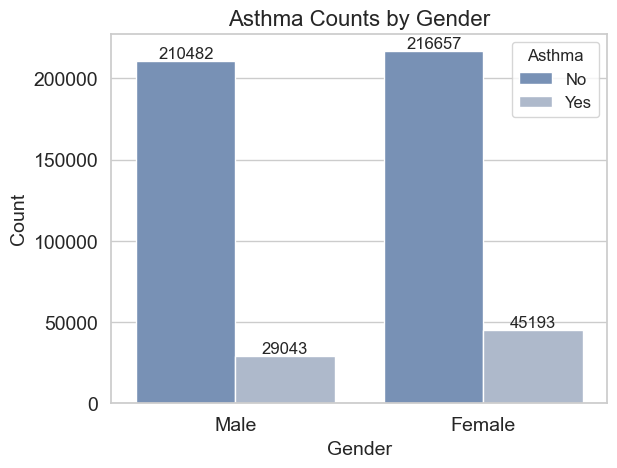

In [34]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Asthma", data=train)

for c in ax.containers:
    ax.bar_label(c)

# Set plot title, labels, and show the plot
plt.title('Asthma Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

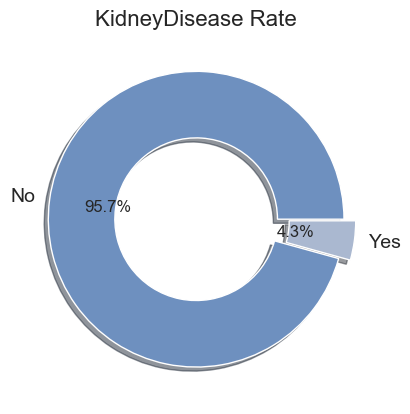

In [35]:
HeartDisease_rate = train["KidneyDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%1.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode=[0, 0.08])
plt.title("KidneyDisease Rate")
plt.show();

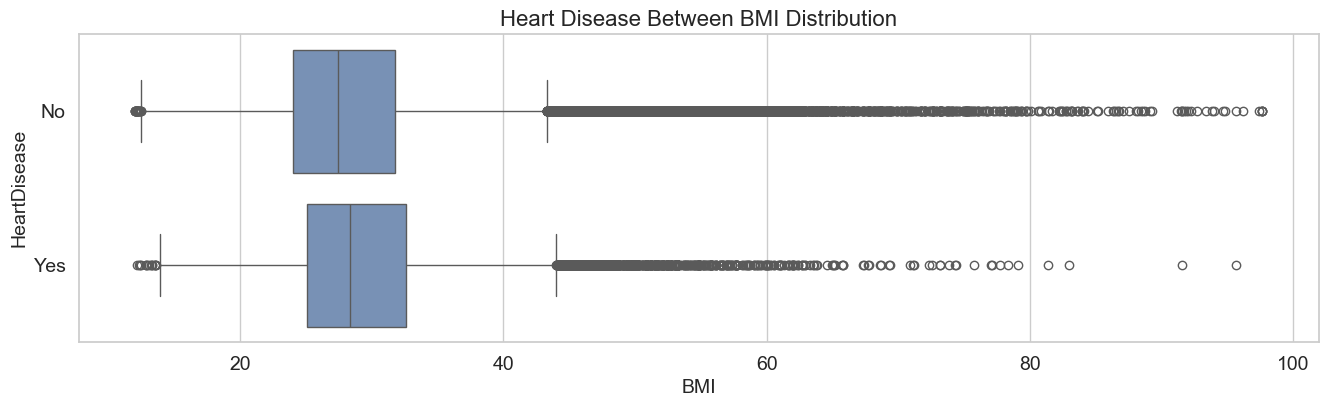

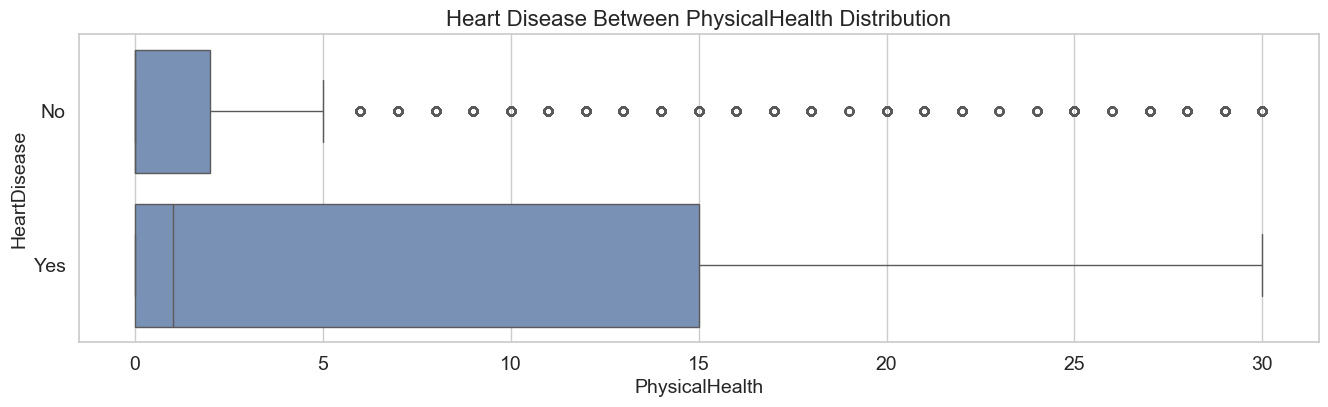

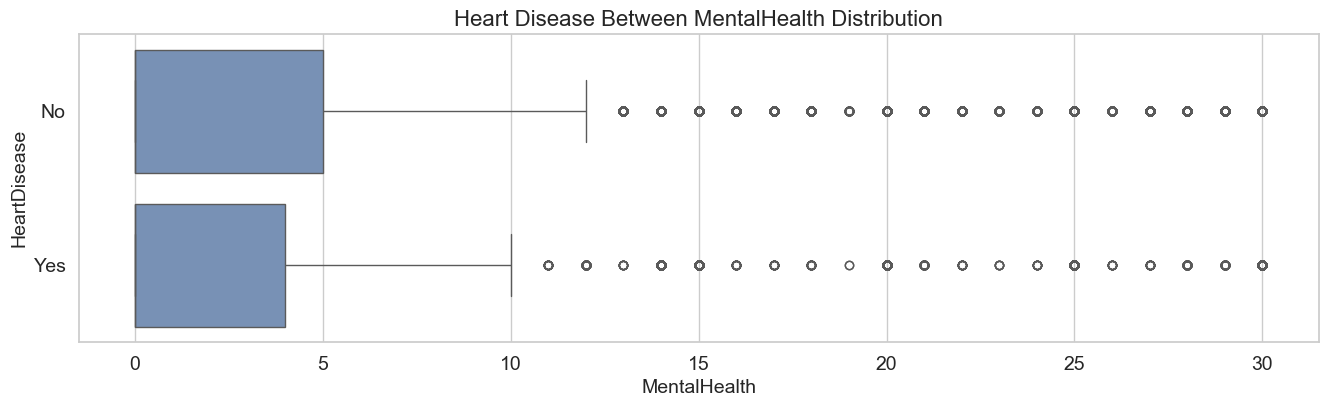

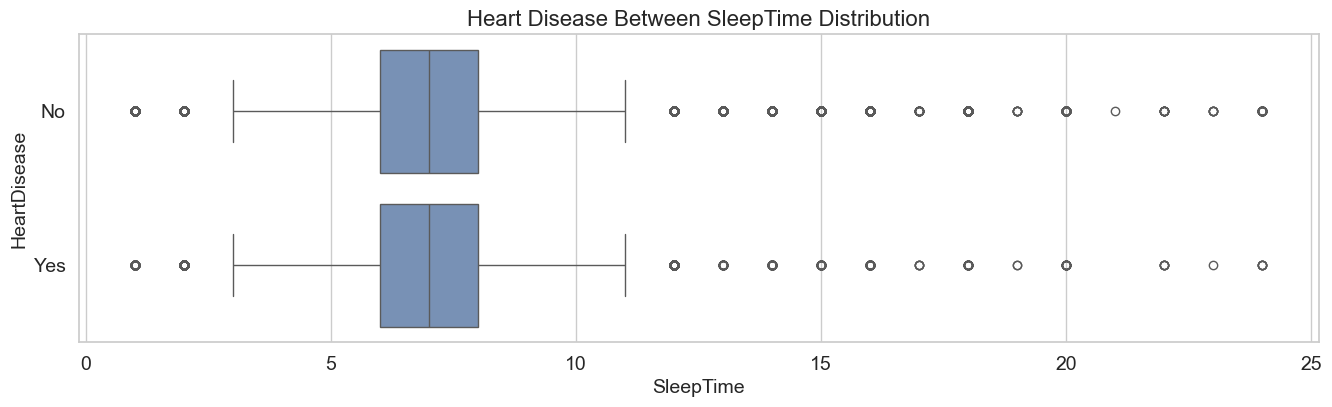

In [36]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 4))
    sns.boxplot(data=train, x=col, y='HeartDisease')
    plt.title(f'Heart Disease Between {col} Distribution')
    plt.show()

In [37]:
def get_outliers(train, column):
    # Calculate quartiles
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Extract outliers
    outliers = train[(train[column] < lower_limit) | (train[column] > upper_limit)]
    
    return outliers, lower_limit, upper_limit

def drop_outliers(dataframe, columns):
    new_df = dataframe.copy()  # Create a copy of the original DataFrame
    for column in columns:
        # Calculate quartiles
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Drop outliers
        dataframe = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
    
    return dataframe

In [38]:
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI',]
train = drop_outliers(train, columns_to_check)

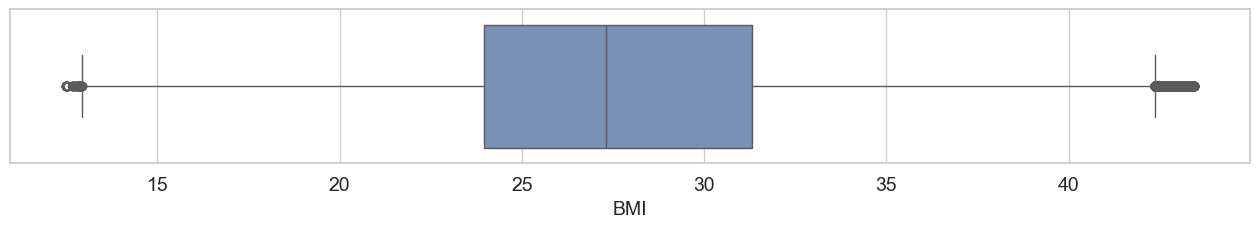

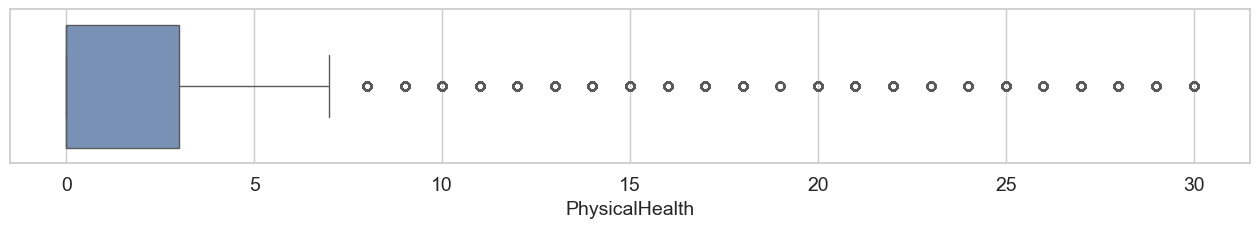

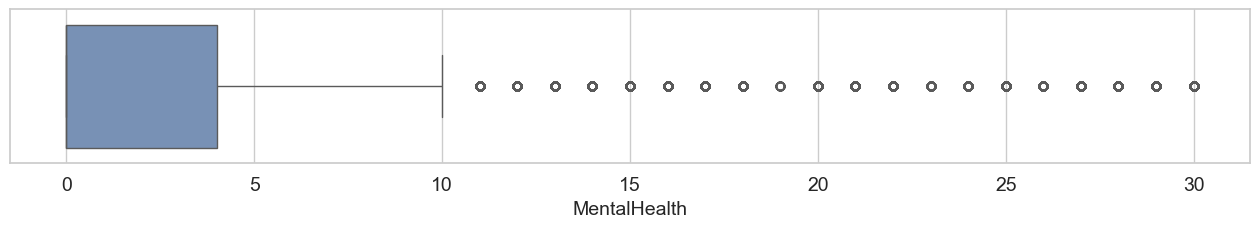

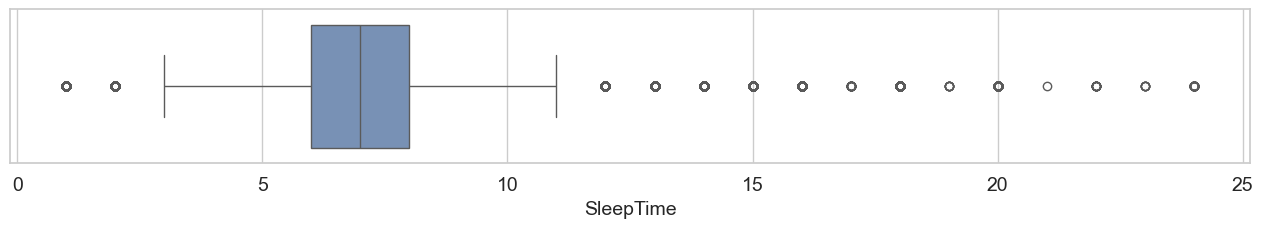

In [39]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=train, x=col)
    plt.show()

# Preprocessing Pipeline

In [40]:
temp, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['HeartDisease'])

train, val = train_test_split(temp, test_size = 0.125, random_state = 42,
                                      stratify=temp['HeartDisease'])

train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, val.shape, test.shape)
print(round((100*train.shape[0]/df.shape[0]), 2),
      round((100*val.shape[0]/df.shape[0]), 2),
      round((100*test.shape[0]/df.shape[0]), 2))

(438703, 18) (62672, 18) (125344, 18)
70.0 10.0 20.0


In [41]:
X_train, y_train = train.drop(columns = 'HeartDisease'), train['HeartDisease']
X_val, y_val = val.drop(columns = 'HeartDisease'), val['HeartDisease']
X_test, y_test = test.drop(columns = 'HeartDisease'), test['HeartDisease']

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(438703, 17) (438703,)
(62672, 17) (62672,)
(125344, 17) (125344,)


In [42]:
num_attris = X_train.select_dtypes(np.number).columns
cat_attris = X_train.select_dtypes(object).columns

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, random_state = 42):
        self.random_state = random_state
        
    def fit(self, X, y = None):
        self.encoding = { 
            'Sex' : dict(zip(['Female', 'Male'], [0, 1])),
            'GenHealth' : dict(zip(['Poor', 'Fair', 'Good',
                                    'Very good', 'Excellent'], range(5))),
            'PhysicalActivity' : dict(zip(['No', 'Yes'], [0, 1])),
            'Stroke' : dict(zip(['No', 'Yes'], [0, 1])),
            'Asthma' :  dict(zip(['No', 'Yes'], [0, 1])),
            'SkinCancer' :  dict(zip(['No', 'Yes'], [0, 1])),
            'Diabetic' : dict(zip(['No',  'No, borderline diabetes',
                                   'Yes (during pregnancy)','Yes'], range(4))),
            'AlcoholDrinking' : dict(zip(['No', 'Yes'], [0, 1])),
            'AgeCategory' : dict(zip(['18-24', '25-29', '30-34', '35-39',
                                        '40-44', '45-49', '50-54', '55-59',
                                        '60-64', '65-69', '70-74', '75-79',
                                        '80 or older'], range(14))),

            'KidneyDisease' : dict(zip(['No', 'Yes'], [0, 1])),
            'Smoking' : dict(zip(['Never smoked', 'No', 'Former smoker', 'Yes',
                                  'Current smoker - now smokes some days',
                                  'Current smoker - now smokes every day',
                                  ], range(10))),

            'DiffWalking' :  dict(zip(['No', 'Yes'], [0, 1])),
                   }
        self.feature_names = X.columns
        
        return self
    
    def transform(self, X):
        X_ = X.copy()
        for col in self.encoding.keys():
            X_[col] = X_[col].map(self.encoding[col])
            X_[col] = X_[col].astype('int')
        return X_
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
encoder = OrdinalEncoder()
encoder.fit_transform(X_train[cat_attris]).head()

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race
0,0,10,2,1,0,2,1,0,0,1,0,0,White
1,0,4,3,1,0,1,0,0,0,0,0,0,White
2,1,11,1,0,1,2,0,0,0,1,1,0,White
3,0,12,2,1,1,2,0,1,0,0,0,3,White
4,1,0,2,1,0,0,0,0,0,0,0,0,Hispanic


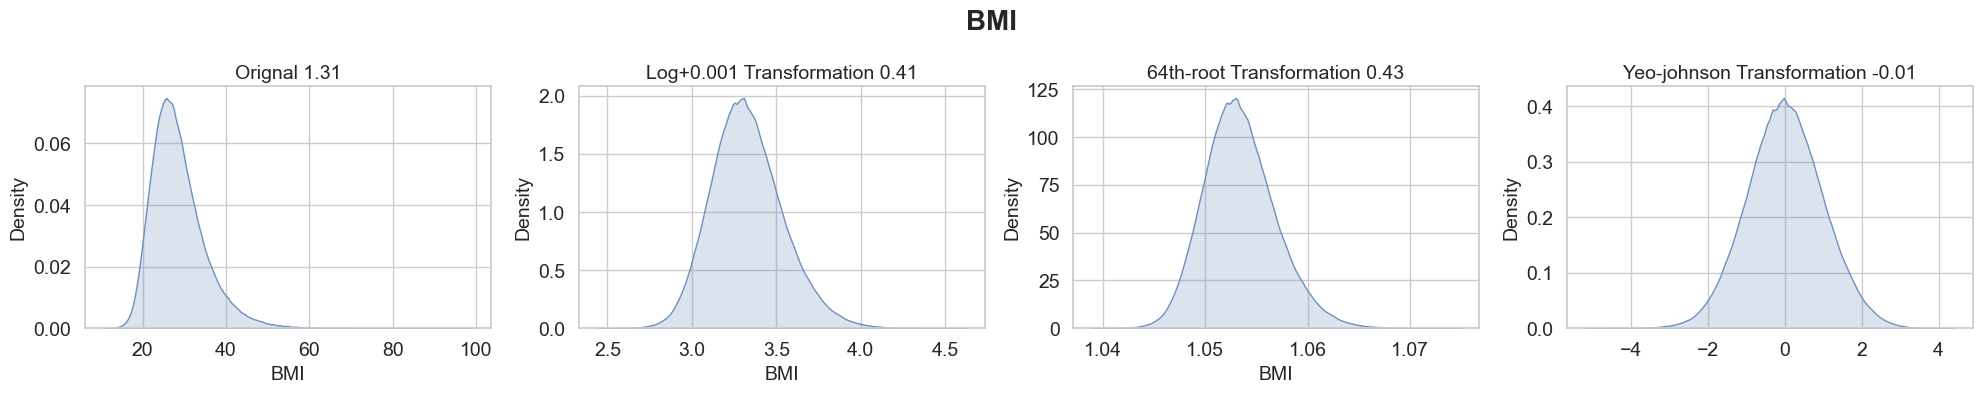

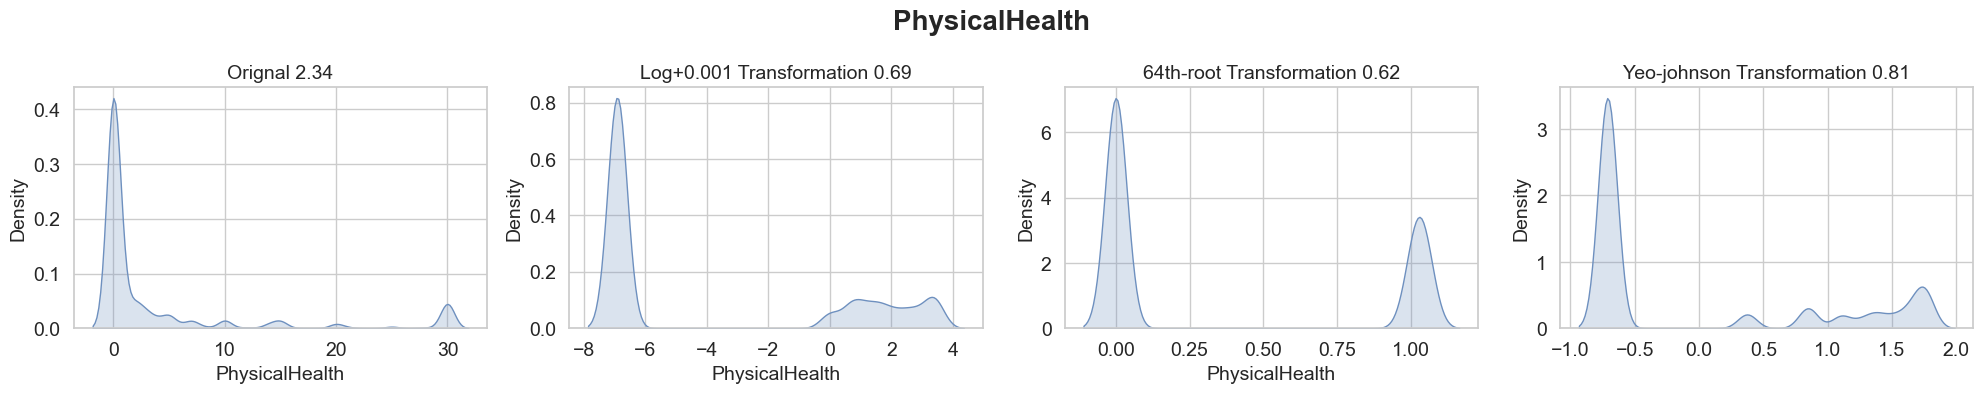

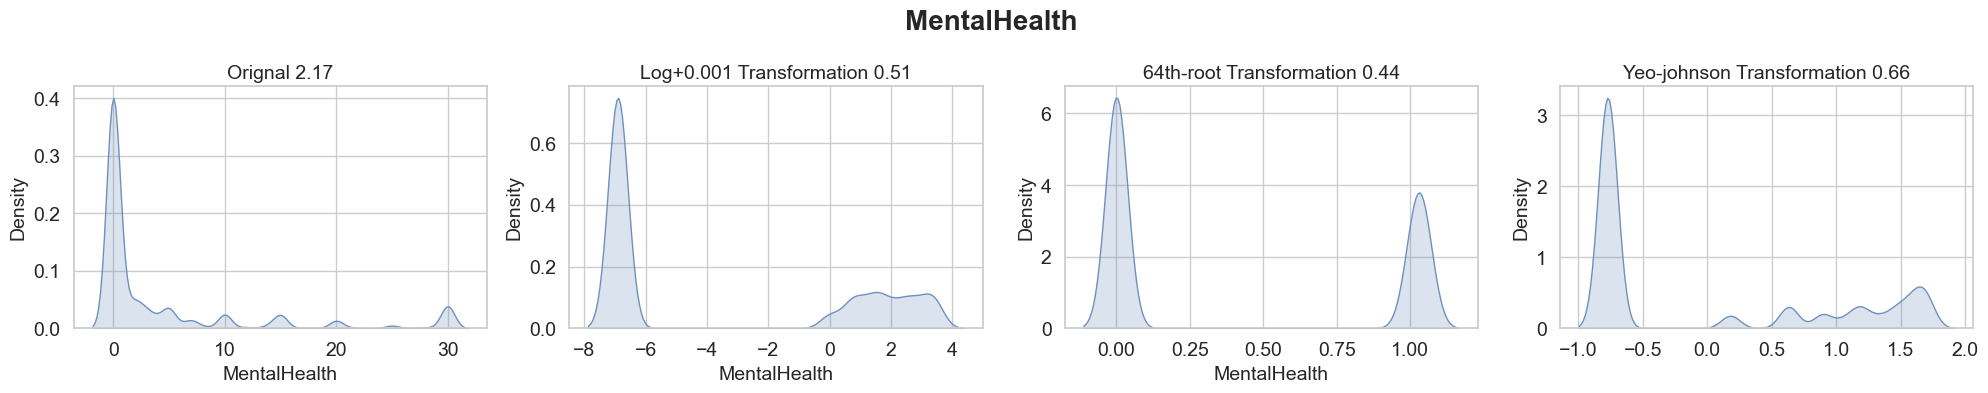

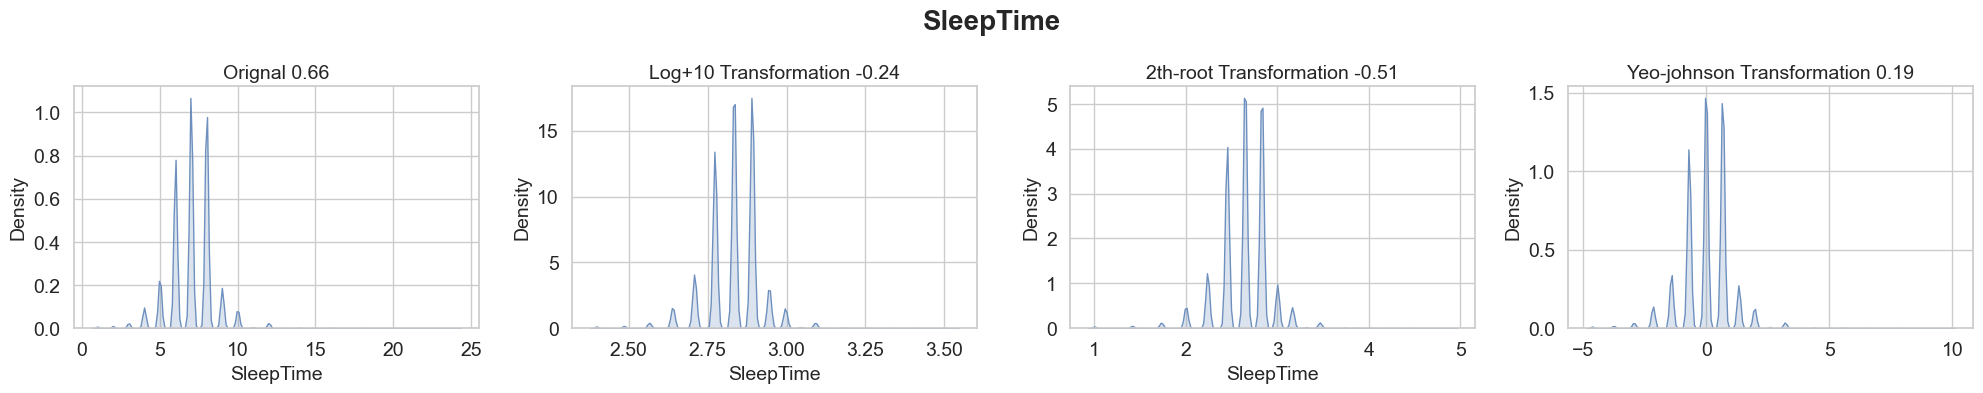

In [44]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

for attr in num_attris:
    fig, ax = plt.subplots(1, 4, figsize=(20,4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill = True, ax=ax[0])
    ax[0].set_title(f'Orignal {skf}', fontsize=14)

    
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i+X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf    
            
    log_bmi = np.log(x+X_train[attr])
    skf = round( skew(log_bmi), 2)
    sns.kdeplot(log_bmi, fill = True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}', fontsize=14)


    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf  

    sqrt_bmi = np.power(X_train[attr], x)
    sns.kdeplot(sqrt_bmi, fill = True, ax=ax[2])
    skf = round(skew(sqrt_bmi), 2)
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}', fontsize=14)

    transformer = PowerTransformer()
    yeo_bmi = transformer.fit_transform((X_train[[attr]]+1))[:,  0]
    skf = round(skew(yeo_bmi), 2)
    sns.kdeplot(yeo_bmi, fill = True, ax=ax[3])
    ax[3].set_title(f'Yeo-johnson Transformation {skf}', fontsize=14)
    

    plt.suptitle(attr, fontsize=20, weight='bold')
    plt.tight_layout(pad=1.1)
    plt.show()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ['SleepTime', 'BMI']
num_pipeline0 = Pipeline([
    ('transform', PowerTransformer()),
    ('scale',StandardScaler()) ])
num_pipeline0

Pipeline(steps=[('transform', PowerTransformer()), ('scale', StandardScaler())])

In [46]:
class NRootTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n = 1/2, random_state = 42):
        self.random_state = random_state
        self.n = n
        
    def fit(self, X, y = None):
        self.feature_names = X.columns
        return self
    
    def transform(self, X):
        return np.power(X, self.n)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
transformer = NRootTransformer(n = 1/32)
transformer.fit_transform(X_train[['PhysicalHealth', 'MentalHealth']]).head()

,PhysicalHealth,MentalHealth
0,1.062697,0.0
1,0.000000,0.0
2,0.000000,0.0
3,1.034928,0.0
4,0.000000,0.0


In [47]:
# ['PhysicalHealth', 'MentalHealth']
num_pipeline1 = Pipeline([
    ('transform', NRootTransformer(n = 1/32)),
    ('scale',StandardScaler()) ])
num_pipeline1

Pipeline(steps=[('transform', NRootTransformer(n=0.03125)),
                ('scale', StandardScaler())])

In [48]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder


ord_cat_attris = ['Sex', 'GenHealth', 'PhysicalActivity', 'Stroke', 'Asthma',
               'SkinCancer', 'Diabetic', 'AlcoholDrinking', 'AgeCategory',
               'KidneyDisease', 'Smoking', 'DiffWalking']

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline0', num_pipeline0, ['BMI', 'SleepTime']),
    ('num_pipeline1', num_pipeline1, ['PhysicalHealth', 'MentalHealth']),
    ('ord_pipeline', OrdinalEncoder(), ord_cat_attris),
    ('drop', 'drop', ['Race']),
                                ],
    remainder = "drop")

preprocessing_pipeline

ColumnTransformer(transformers=[('num_pipeline0',
                                 Pipeline(steps=[('transform',
                                                  PowerTransformer()),
                                                 ('scale', StandardScaler())]),
                                 ['BMI', 'SleepTime']),
                                ('num_pipeline1',
                                 Pipeline(steps=[('transform',
                                                  NRootTransformer(n=0.03125)),
                                                 ('scale', StandardScaler())]),
                                 ['PhysicalHealth', 'MentalHealth']),
                                ('ord_pipeline', OrdinalEncoder(),
                                 ['Sex', 'GenHealth', 'PhysicalActivity',
                                  'Stroke', 'Asthma', 'SkinCancer', 'Diabetic',
                                  'AlcoholDrinking', 'AgeCategory',
                                  'KidneyDisease', 'Smoking', 'DiffWalking']),
                                ('drop', 'drop', ['Race'])])

In [49]:
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)

print(X_train_processed.shape)
X_train_processed[0]

(438703, 16)


array([-1.02297148,  1.31580739,  1.35768189, -0.80527766,  0.        ,
        2.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        , 10.        ,  0.        ,  2.        ,
        0.        ])

In [50]:
y_train = y_train.replace({'Yes': 1, 'No' : 0})
y_test = y_test.replace({'Yes': 1, 'No' : 0})
y_val = y_val.replace({'Yes': 1, 'No' : 0})

y_train.shape, y_test.shape, y_val.shape

((438703,), (125344,), (62672,))

# Baseline Performance

In [51]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression(max_iter=10000)
clr.fit(X_train_processed, y_train)

LogisticRegression(max_iter=10000)

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

y_val_hat = clr.predict(X_val_processed)

under_sampling_scores = dict()
under_sampling_scores['LogisticRegressionBL'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }
print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

f1 score: 0.1253364090734333
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.52      0.07      0.13      4579

    accuracy                           0.93     62672
   macro avg       0.73      0.53      0.54     62672
weighted avg       0.90      0.93      0.90     62672



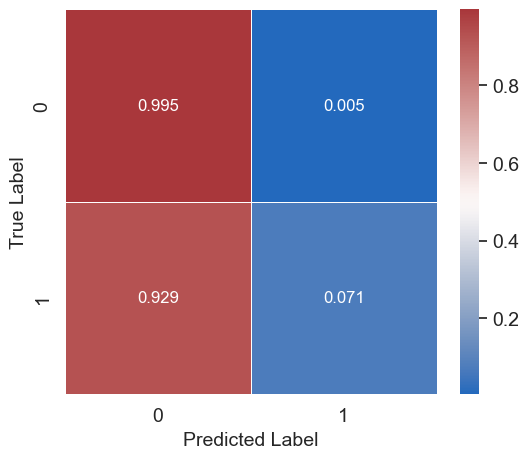

In [53]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_hat, normalize='true'),
            annot=True, fmt=".3f", linewidth=.5, cmap='vlag')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# Under Sampling Evaluation

In [54]:
def plot_sampled_vs_notsampled(y_train, y_train_sampled, title):
    print(f'instances number before sampling: {y_train.shape[0]}')
    print(f"instances number after sampling: {y_train_sampled.shape[0]}")

    print(f"minority class percentage before sampling: {round(y_train.sum()/len(y_train), 3)}")
    print(f"minority class percentage after sampling: {y_train_sampled.sum()/len(y_train_sampled)}")
    
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    HeartDisease_rate = y_train.map({0:'No', 1:'Yes'}).value_counts()
    ax[0].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[0].set_title('original')
    HeartDisease_rate = y_train_sampled.map({0:'No', 1:'Yes'}).value_counts()
    ax[1].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[1].set_title('under-sampled')
    plt.suptitle(title, weight = 'bold')
    plt.show();

instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


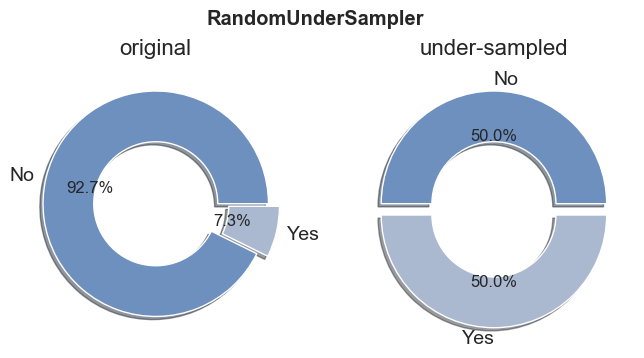

In [55]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

sampler  = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandomUnderSampler')

In [56]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandomUnderSampler'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3075802373912671
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.78      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.58      0.76      0.57     62672
weighted avg       0.92      0.74      0.80     62672



In [57]:
# ClusterCentroids
# Resample into batches
n = 20
batch_size = len(X_train_processed) // n
remainder = len(X_train_processed) % n
X_batches = []
y_batches = []
idx, s = 0, 0
for i in range(n):
    batch_end = idx + batch_size + (1 if i < remainder else 0)
    X_batches.append(X_train_processed[idx:batch_end])
    y_batches.append(y_train[idx:batch_end])
    idx = batch_end
    s += X_batches[i].shape[0]
    assert X_batches[i].shape[0] == y_batches[i].shape[0]
    
assert X_train_processed.shape[0] == s
print(X_train_processed.shape[0], s, X_batches[0].shape )

438703 438703 (21936, 16)


0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


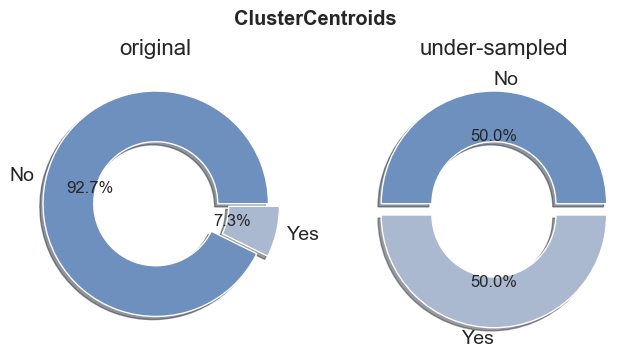

In [58]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = ClusterCentroids(sampling_strategy='majority', random_state = 42,
                           estimator = MiniBatchKMeans(n_init = 1, random_state=42, batch_size=2048))
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'ClusterCentroids')

In [59]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['ClusterCentroids'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.30685026714738717
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.77      0.31      4579

    accuracy                           0.75     62672
   macro avg       0.58      0.76      0.58     62672
weighted avg       0.92      0.75      0.80     62672



instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


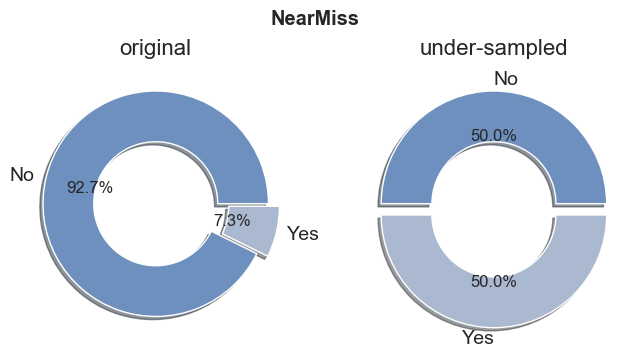

In [60]:
# NearMiss
from imblearn.under_sampling import NearMiss

sampler = NearMiss(sampling_strategy='majority', n_neighbors=3)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NearMiss')

In [61]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NearMiss'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.1792315052626278
              precision    recall  f1-score   support

           0       0.96      0.46      0.62     58093
           1       0.10      0.78      0.18      4579

    accuracy                           0.48     62672
   macro avg       0.53      0.62      0.40     62672
weighted avg       0.90      0.48      0.59     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 428101
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.07487251840103153


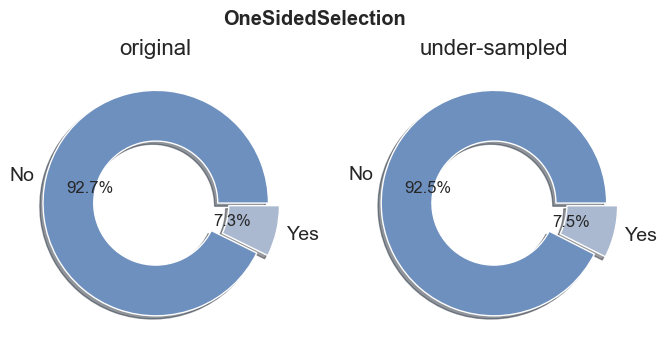

In [62]:
# OneSidedSelection
from imblearn.under_sampling import OneSidedSelection

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = OneSidedSelection(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'OneSidedSelection')

In [63]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['OneSidedSelection'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.15390307066222716
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.50      0.09      0.15      4579

    accuracy                           0.93     62672
   macro avg       0.72      0.54      0.56     62672
weighted avg       0.90      0.93      0.90     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 377907
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08481716401125144


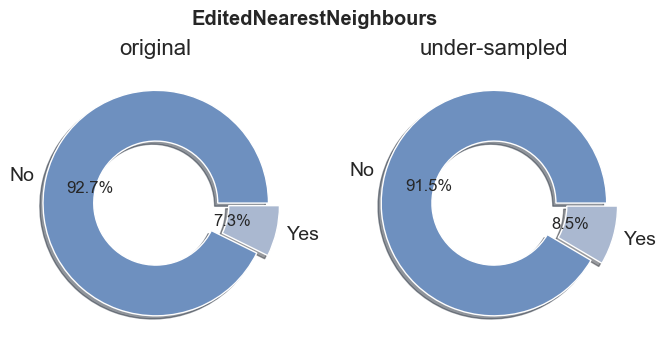

In [64]:
# EditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'EditedNearestNeighbours')


In [65]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['EditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.2882981638805152
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     58093
           1       0.39      0.23      0.29      4579

    accuracy                           0.92     62672
   macro avg       0.66      0.60      0.62     62672
weighted avg       0.90      0.92      0.91     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 351614
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0911596239057603


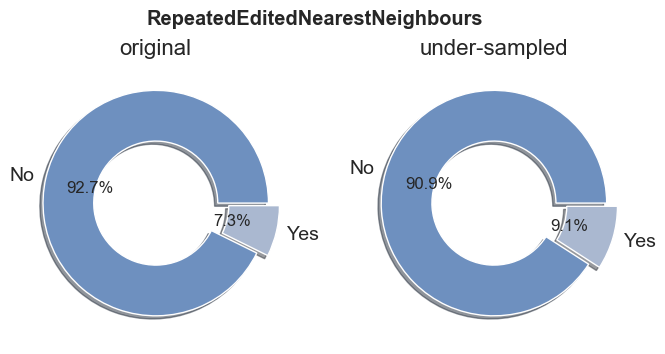

In [66]:
# RepeatedEditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)

X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RepeatedEditedNearestNeighbours')

In [67]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RepeatedEditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3540950455005056
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     58093
           1       0.33      0.38      0.35      4579

    accuracy                           0.90     62672
   macro avg       0.64      0.66      0.65     62672
weighted avg       0.91      0.90      0.90     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 428103
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.07487216861362803


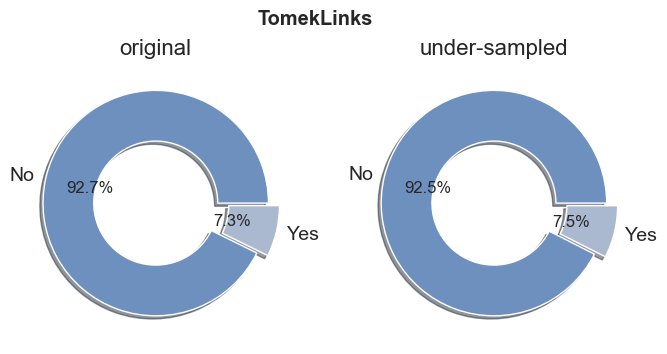

In [68]:
# TomekLinks
from imblearn.under_sampling import TomekLinks

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = TomekLinks(sampling_strategy='majority')
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'TomekLinks')

In [69]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['TomekLinks'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.15296296296296297
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.50      0.09      0.15      4579

    accuracy                           0.93     62672
   macro avg       0.72      0.54      0.56     62672
weighted avg       0.90      0.93      0.90     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 365169
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08777579695976384


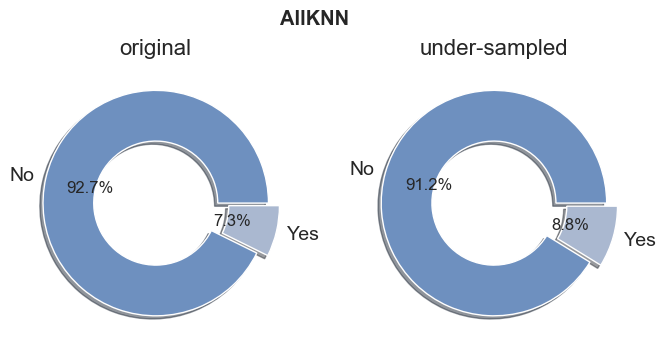

In [70]:
# ALLKNN
from imblearn.under_sampling import AllKNN

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = AllKNN(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'AllKNN')

In [71]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['AllKNN'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3224646367777511
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     58093
           1       0.36      0.29      0.32      4579

    accuracy                           0.91     62672
   macro avg       0.65      0.63      0.64     62672
weighted avg       0.90      0.91      0.91     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 164507
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.19484277264797242


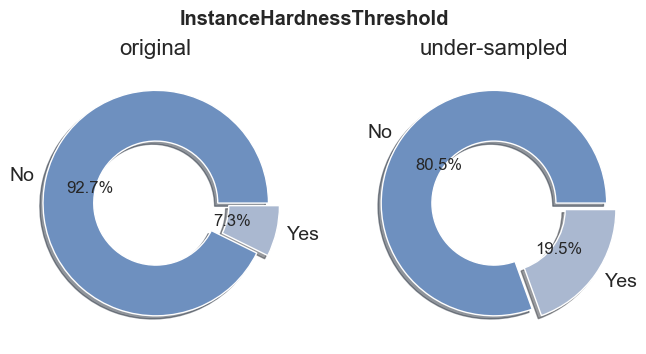

In [72]:
# InstanceHardnessThreshold
from imblearn.under_sampling import InstanceHardnessThreshold

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = InstanceHardnessThreshold(sampling_strategy='majority', cv=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'InstanceHardnessThreshold')

In [73]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['InstanceHardnessThreshold'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.27721232683064745
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     58093
           1       0.17      0.86      0.28      4579

    accuracy                           0.67     62672
   macro avg       0.57      0.76      0.53     62672
weighted avg       0.92      0.67      0.75     62672



0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 380817
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08416903657137155


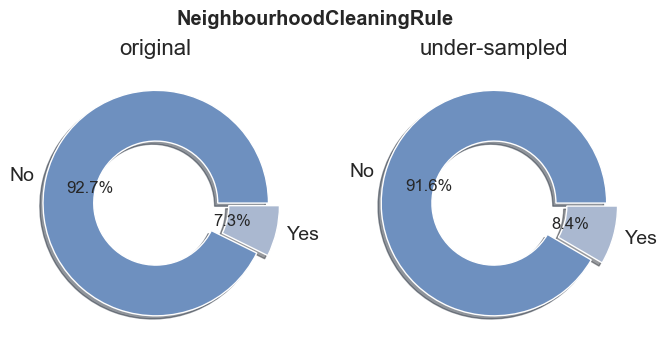

In [74]:
# NeighbourhoodCleaningRule
from imblearn.under_sampling import NeighbourhoodCleaningRule

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = NeighbourhoodCleaningRule(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NeighbourhoodCleaningRule')

In [75]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NeighbourhoodCleaningRule'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.24942826650404026
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     58093
           1       0.41      0.18      0.25      4579

    accuracy                           0.92     62672
   macro avg       0.68      0.58      0.60     62672
weighted avg       0.90      0.92      0.91     62672



# Combining Best Selection and Cleaning Techniques

instances number before sampling: 438703
instances number after sampling: 63568
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5042316889000755


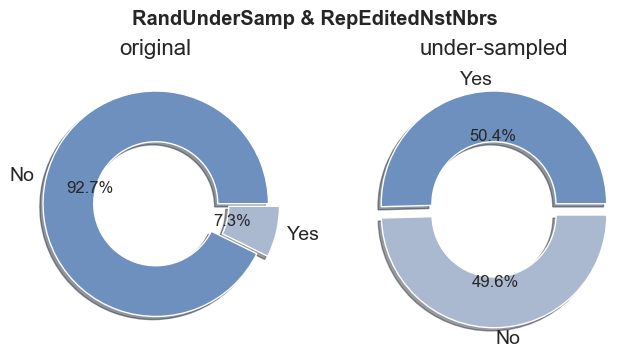

In [76]:
sampler  = RandomUnderSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandUnderSamp & RepEditedNstNbrs')

In [77]:
# Combining techniquies did not work out
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandUnderSamp & RepEditedNstNbrs'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.2545611706232828
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     58093
           1       0.15      0.90      0.25      4579

    accuracy                           0.61     62672
   macro avg       0.57      0.75      0.50     62672
weighted avg       0.93      0.61      0.70     62672



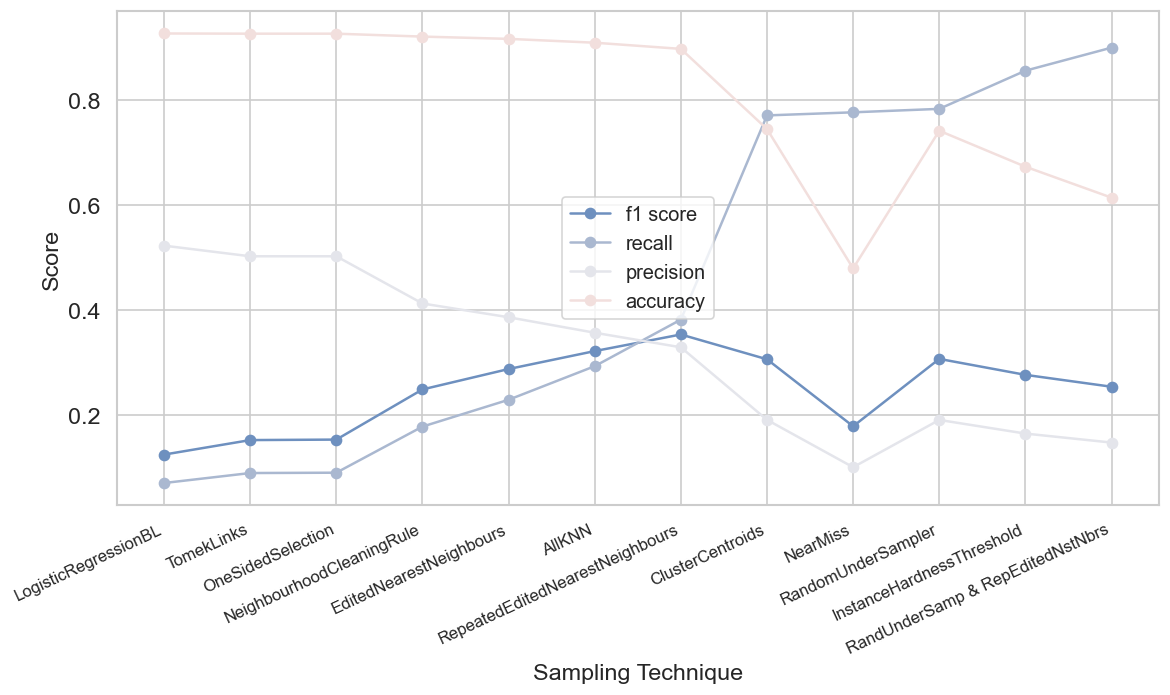

In [78]:
plt.figure(figsize=(10, 6), dpi = 120)
sampling_scores = pd.DataFrame(under_sampling_scores).T.sort_values(by = 'recall')


plt.plot(sampling_scores['f1 score'], marker = 'o', linewidth = 1.5, label = 'f1 score')
plt.plot(sampling_scores['recall'], marker = 'o', linewidth = 1.5, label = 'recall')
plt.plot(sampling_scores['precision'], marker = 'o', linewidth = 1.5, label = 'precision')
plt.plot(sampling_scores['accuracy'], marker = 'o', linewidth = 1.5, label = 'accuracy')

plt.xlabel('Sampling Technique')
plt.ylabel('Score')
plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
plt.legend()
plt.tight_layout(pad=1.2)
plt.show()

# Choosing the Best Model

In [79]:
from imblearn.under_sampling import RandomUnderSampler

sampler  = RandomUnderSampler(sampling_strategy=0.25)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classifiers = {
    #KNN
    'KNN': KNeighborsClassifier(n_neighbors=3),
    #linear models
    'LogisticRegression':LogisticRegression(random_state = 42, max_iter=1000),
    'SGDClassifier':SGDClassifier(random_state = 42),


    #support-vector-machine
     'LinearSVC':LinearSVC(random_state = 42, max_iter = 10000),
    
    #tree-based models
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state = 42),

    #ensemble models
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state = 42),
    'RandomForestClassifier': RandomForestClassifier(random_state = 42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state = 42),
    'CatBoostClassifier':CatBoostClassifier(random_state = 42, verbose=False),
    'XGBClassifier': XGBClassifier(random_state = 42),
    'LGBMClassifier':LGBMClassifier(random_state = 42, verbose=0),

    #other models
    'AdaBoostClassifier': AdaBoostClassifier(algorithm="SAMME", random_state=42),
    'MLPClassifier': MLPClassifier(alpha=1, max_iter=1000, random_state=42),


}

In [81]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score

val_scores = dict()
train_scores = dict()

for clr in classifiers.keys():
    print(f'Training {clr} now.')
    classifiers[clr].fit(X_train_resampled, y_train_resampled)
    y_train_pred = classifiers[clr].predict(X_train_resampled)
    train_score = {
        'recall' : recall_score(y_train_resampled, y_train_pred, zero_division=0),
        'precision' : precision_score(y_train_resampled, y_train_pred, zero_division=0),
        'accuracy' : accuracy_score(y_train_resampled, y_train_pred),
        'f1_score' : f1_score(y_train_resampled, y_train_pred, zero_division=0),
        'auc_score': roc_auc_score(y_train_resampled, y_train_pred),
    }
    train_scores[clr] = train_score
    
    y_val_pred = classifiers[clr].predict(X_val_processed)
    val_score = {
        'recall' : recall_score(y_val, y_val_pred, zero_division=0),
        'precision' : precision_score(y_val, y_val_pred, zero_division=0),
        'accuracy' : accuracy_score(y_val, y_val_pred),
        'f1_score' : f1_score(y_val, y_val_pred, zero_division=0),
        'auc_score': roc_auc_score(y_val, y_val_pred),
    }
    val_scores[clr] = val_score
    print(f'f1 score train: {train_score["f1_score"]:.3f}, validation: {val_score["f1_score"]:.3f}')
    print('-'*50)

Training KNN now.
f1 score train: 0.663, validation: 0.274
--------------------------------------------------
Training LogisticRegression now.
f1 score train: 0.433, validation: 0.346
--------------------------------------------------
Training SGDClassifier now.
f1 score train: 0.251, validation: 0.217
--------------------------------------------------
Training LinearSVC now.
f1 score train: 0.394, validation: 0.320
--------------------------------------------------
Training DecisionTreeClassifier now.
f1 score train: 0.995, validation: 0.245
--------------------------------------------------
Training ExtraTreeClassifier now.
f1 score train: 0.995, validation: 0.249
--------------------------------------------------
Training GradientBoostingClassifier now.
f1 score train: 0.462, validation: 0.354
--------------------------------------------------
Training RandomForestClassifier now.
f1 score train: 0.995, validation: 0.317
--------------------------------------------------
Training Ext

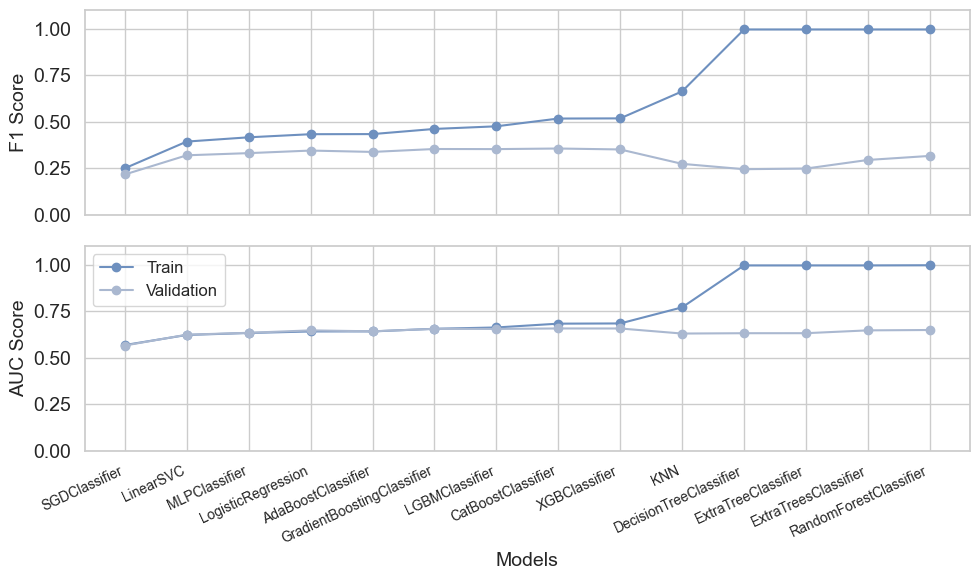

In [82]:
train_models_scores = pd.DataFrame(train_scores).T.sort_values(by = ['f1_score', 'auc_score',])
val_models_scores = pd.DataFrame(val_scores).T.loc[list(train_models_scores.index.values)]

fig, ax = plt.subplots(2, 1,sharex=True ,figsize=(10, 6))

ax[0].plot(train_models_scores['f1_score'], marker = 'o', linewidth = 1.5, label = 'Train')
ax[0].plot(val_models_scores['f1_score'], marker = 'o', linewidth = 1.5, label = 'Validation')
ax[0].set_ylabel('F1 Score')
ax[0].set_ylim([0, 1.1])

ax[1].plot(train_models_scores['auc_score'], marker = 'o', linewidth = 1.5, label = 'Train')
ax[1].plot(val_models_scores['auc_score'], marker = 'o', linewidth = 1.5, label = 'Validation')
ax[1].set_ylabel('AUC Score')
ax[1].set_ylim([0, 1.1])

plt.xlabel('Models')

plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
plt.legend()
plt.tight_layout(pad=1.2)
plt.show()

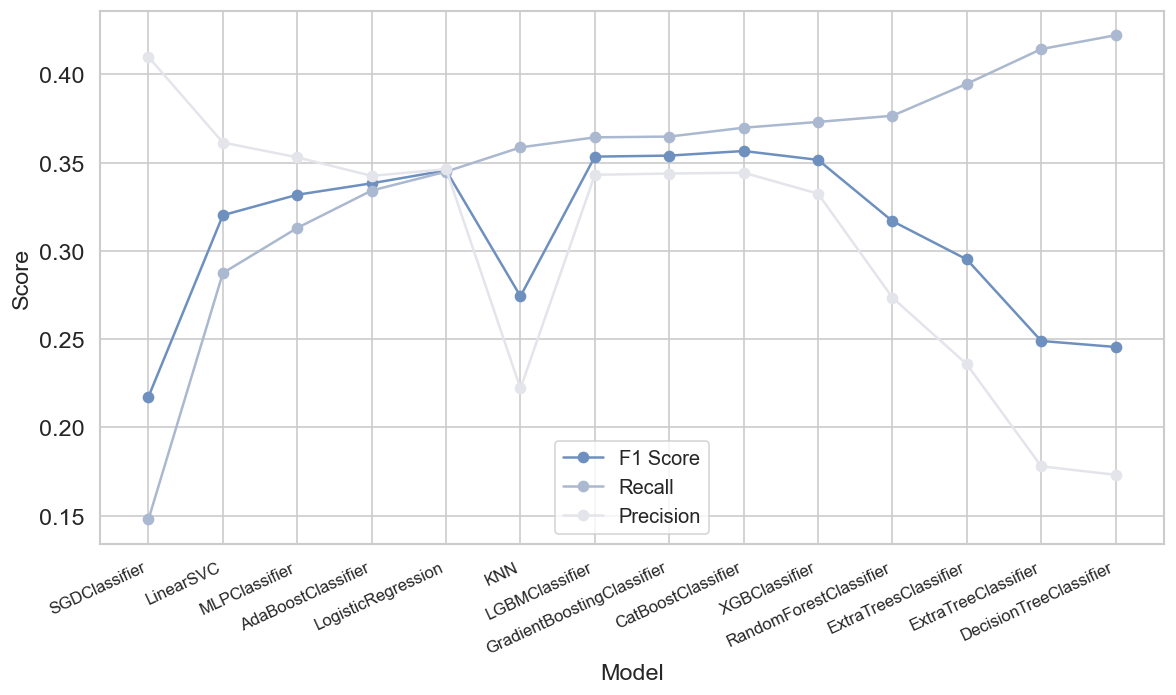

In [83]:
plt.figure(figsize=(10, 6), dpi = 120)
val_models_scores=val_models_scores.sort_values(by='recall')

plt.plot(val_models_scores['f1_score'], marker = 'o', linewidth = 1.5, label = 'F1 Score')
plt.plot(val_models_scores['recall'], marker = 'o', linewidth = 1.5, label = 'Recall')
plt.plot(val_models_scores['precision'], marker = 'o', linewidth = 1.5, label = 'Precision')

plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(size=10, rotation=25, horizontalalignment='right', fontweight='light')
plt.legend()
plt.tight_layout(pad=1.2)
plt.show()

# Hyperparameter Tuning

In [84]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2)
strart_3_splits_index = []
for train_index, val_index in splitter.split(train.drop(columns= 'HeartDisease'), train['HeartDisease']):
    strart_3_splits_index.append((train_index, val_index))

In [85]:
param_grid = {
    'sampling_strategy': [0, 0.125, 0.25, 0.5, 1.0],
    'class_weight': [dict({1: x, 0 : 1.0-x}) 
                                      for x in [0.5, 0.6, 0.7, 0.8, 0.9]],
}
grid_search_results = dict()

i=0
for smp_stgy in param_grid['sampling_strategy']:
    for clss_wght in param_grid['class_weight']:
        avg_f1_score=0.0
        print(f'sampling_strategy: {smp_stgy}, class1_weight: {clss_wght[1]}, ', end='')
        for fold_k in strart_3_splits_index:
            #train fold
            temp = train.iloc[fold_k[0]]
            X_train_fold, y_train_fold = temp.drop(columns= 'HeartDisease'), temp['HeartDisease']
            #preprocess train-set
            X_train_fold = preprocessing_pipeline.fit_transform(X_train_fold)
            y_train_fold = y_train_fold.map({'Yes':1, 'No':0})
            
            #validation fold
            temp = train.iloc[fold_k[1]]
            X_val_fold, y_val_fold = temp.drop(columns= 'HeartDisease'), temp['HeartDisease']
            #preprocess validation-set
            X_val_fold = preprocessing_pipeline.transform(X_val_fold)
            y_val_fold = y_val_fold.map({'Yes':1, 'No':0})
            
            
            #resampling train-set
            if smp_stgy==0:
                X, y = X_train_fold, y_train_fold
            else:
                sampler = RandomUnderSampler(sampling_strategy=smp_stgy, random_state=42)
                X, y = sampler.fit_resample(X_train_fold, y_train_fold)
            #fitting model
            clr = LGBMClassifier(random_state=42, class_weight=clss_wght, verbose=0)
            clr = clr.fit(X, y)
            
            #y_val_score
            y_val_fold_hat = clr.predict(X_val_fold)
            avg_f1_score +=f1_score(y_val_fold, y_val_fold_hat, zero_division=0)
            val_score = {
                'sampling_strategy': smp_stgy,
                'class1_weight': clss_wght[1],
                'f1_score' : f1_score(y_val_fold, y_val_fold_hat, zero_division=0),
                'recall' : recall_score(y_val_fold, y_val_fold_hat, zero_division=0),
                'precision' : precision_score(y_val_fold, y_val_fold_hat, zero_division=0),
                'accuracy' : accuracy_score(y_val_fold, y_val_fold_hat),
                'auc_score': roc_auc_score(y_val_fold, y_val_fold_hat),
            }
            grid_search_results[f'split_{i}'] = val_score
            i+=1
        print(f'average f1 score: {(avg_f1_score/3.0):.3f}')
        print('-'*75)


sampling_strategy: 0, class1_weight: 0.5, average f1 score: 0.100
---------------------------------------------------------------------------
sampling_strategy: 0, class1_weight: 0.6, average f1 score: 0.201
---------------------------------------------------------------------------
sampling_strategy: 0, class1_weight: 0.7, average f1 score: 0.307
---------------------------------------------------------------------------
sampling_strategy: 0, class1_weight: 0.8, average f1 score: 0.363
---------------------------------------------------------------------------
sampling_strategy: 0, class1_weight: 0.9, average f1 score: 0.331
---------------------------------------------------------------------------
sampling_strategy: 0.125, class1_weight: 0.5, average f1 score: 0.220
---------------------------------------------------------------------------
sampling_strategy: 0.125, class1_weight: 0.6, average f1 score: 0.311
--------------------------------------------------------------------------

In [86]:
grid_search_results = pd.DataFrame(grid_search_results).T
grid_search_results.groupby(['sampling_strategy', 'class1_weight']).mean().sort_values(by='f1_score', ascending = False).head(5)

f1_score    recall  precision  accuracy  \
sampling_strategy class1_weight                                            
0.000             0.8            0.363269  0.440961   0.308863  0.887046   
0.250             0.6            0.362234  0.506629   0.281896  0.869647   
0.125             0.7            0.359530  0.411896   0.318977  0.892772   
                  0.8            0.352005  0.610045   0.247372  0.835888   
0.250             0.5            0.350497  0.361202   0.340412  0.902186   

                                 auc_score  
sampling_strategy class1_weight             
0.000             0.8             0.681585  
0.250             0.6             0.702446  
0.125             0.7             0.671287  
                  0.8             0.731868  
0.250             0.5             0.653016

# Final Pipeline

In [87]:
class_weights = {1:0.6, 0:0.4}
full_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('classifier', LGBMClassifier(class_weight=class_weights, random_state=42, verbose=0)),
])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline0',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['BMI', 'SleepTime']),
                                                 ('num_pipeline1',
                                                  Pipeline(steps=[('transform',
                                                                   NRootTransformer(n=0.03125)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['PhysicalHealth',
                                                   'MentalHealth']),
                                                 ('ord_pipeline',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'GenHealth',
                                                   'PhysicalActivity', 'Stroke',
                                                   'Asthma', 'SkinCancer',
                                                   'Diabetic',
                                                   'AlcoholDrinking',
                                                   'AgeCategory',
                                                   'KidneyDisease', 'Smoking',
                                                   'DiffWalking']),
                                                 ('drop', 'drop', ['Race'])])),
                ('classifier',
                 LGBMClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=42,
                                verbose=0))])

In [88]:
X_train_preprocessed = full_pipeline['preprocessor'].fit_transform(X_train)

instances number before sampling: 438703
instances number after sampling: 160265
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.2


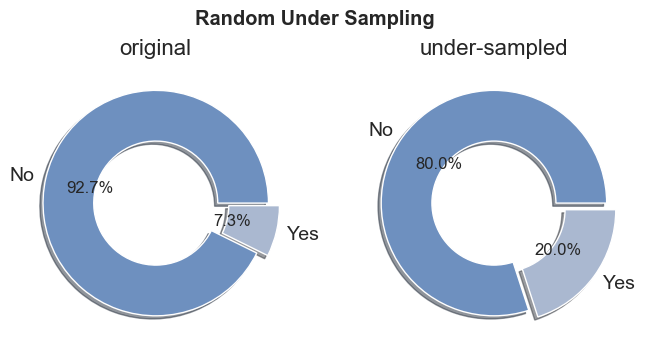

In [89]:
sampler  = RandomUnderSampler(sampling_strategy=0.25)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'Random Under Sampling')

In [90]:
full_pipeline['classifier'].fit(X_train_resampled, y_train_resampled)

LGBMClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=42, verbose=0)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     58093
           1       0.28      0.52      0.37      4579

    accuracy                           0.87     62672
   macro avg       0.62      0.71      0.65     62672
weighted avg       0.91      0.87      0.89     62672



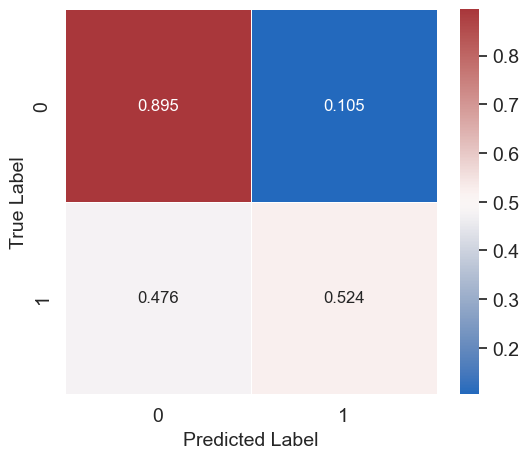

In [91]:
y_val_hat = full_pipeline['classifier'].predict(X_val_processed)
print(classification_report(y_val, y_val_hat))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_hat, normalize='true'),
            annot=True, fmt=".3f", linewidth=.5, cmap='vlag')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [92]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, x0, x1, rc):
    plt.plot(thresholds, precisions[:-1], "--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)   
    plt.grid(True)                     
    plt.axis([x0, x1, 0, 1.])
    precision_recall_rc = precisions[np.argmin(recalls >= rc)]
    threshold_recall_rc = thresholds[np.argmin(recalls >= rc)]

    plt.plot([threshold_recall_rc, threshold_recall_rc], [x0, rc], "b:")
    plt.plot([x0, threshold_recall_rc], [rc, rc], "b:")
    
    plt.plot([x0, threshold_recall_rc], [precision_recall_rc, precision_recall_rc], "b:")
    plt.plot([threshold_recall_rc], [rc], "bo")
    plt.plot([threshold_recall_rc], [precision_recall_rc], "bo")

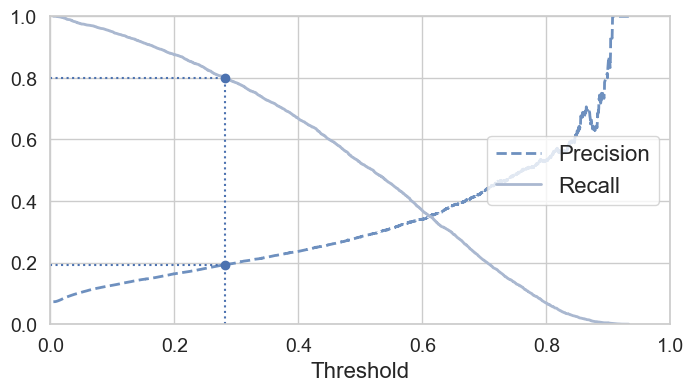

In [93]:
from sklearn.metrics import precision_recall_curve

y_val_score = full_pipeline['classifier'].predict_proba(X_val_processed)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_score[:, 1])

plt.figure(figsize=(8, 4))                                                          

plot_precision_recall_vs_threshold(precisions, recalls, thresholds, 0, 1, 0.80)
precision_recall_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_recall_80 = thresholds[np.argmin(recalls >= 0.80)]

plt.show()

In [94]:
y_val_rc80 = np.int16(y_val_score[:,1] > threshold_recall_80)
print(classification_report(y_val, y_val_rc80))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.80      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.59      0.77      0.58     62672
weighted avg       0.92      0.74      0.80     62672



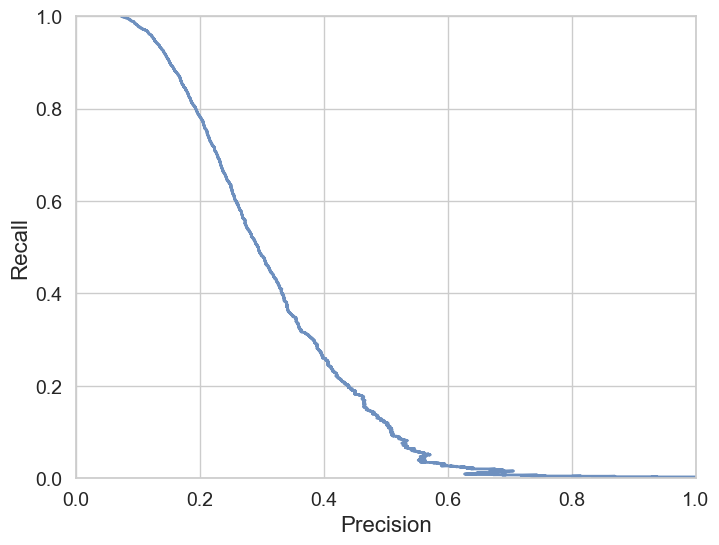

In [95]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(precisions, recalls, "-", linewidth=2)
    plt.ylabel("Recall", fontsize=16)
    plt.xlabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.90      0.93    116186
           1       0.28      0.51      0.36      9158

    accuracy                           0.87    125344
   macro avg       0.62      0.70      0.64    125344
weighted avg       0.91      0.87      0.88    125344



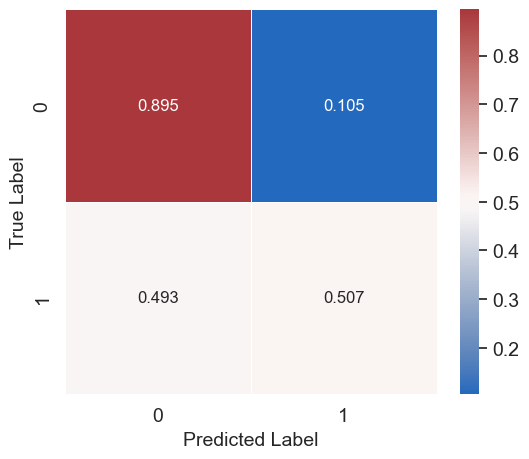

In [96]:
X_test_preprocessed = full_pipeline['preprocessor'].transform(X_test)
y_test_hat = full_pipeline['classifier'].predict(X_test_preprocessed)

print(classification_report(y_test, y_test_hat))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_hat, normalize='true'),
            annot=True, fmt=".3f", linewidth=.5, cmap='vlag')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [97]:
full_pipeline['classifier']

LGBMClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=42, verbose=0)

In [100]:
import pickle

with open('models//LGBM_acc_87.pkl', 'wb') as file:
    pickle.dump(full_pipeline, file)
    

FileNotFoundError: [Errno 2] No such file or directory: '//models//LGBM_acc_87.pkl'